# EDA CASE STUDY - 01

### 1. Importing The Modules

In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
pd.set_option("max_rows", None)
pd.set_option('display.max_columns', 500)

### 2. Reading the DATA set

In [3]:
# reading and understanding of data:
application_data = pd.read_csv('E:\\DATA SCIENCE\\CASE STUDY\\application_data.csv')
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
previous_application =pd.read_csv('E:\\DATA SCIENCE\\CASE STUDY\\previous_application.csv')
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
application_data.shape

(307511, 122)

In [6]:
previous_application.shape

(1670214, 37)

In [7]:
application_data.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,306219,307511,307511,307511,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,211120,307509.000000,307511.000000,307511.000000,307511,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,97216,153214,159080.000000,151170,161756,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
previous_application.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,1670214,1.670214e+06,774370.000000,5951.000000,5951.000000,1670214,1670214,1.670214e+06,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1.670214e+06,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,2,NaN,NaN,NaN,NaN,25,4,NaN,4,9,7,4,28,5,3,8,NaN,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,Y,NaN,NaN,NaN,NaN,XAP,Approved,NaN,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,1661739,NaN,NaN,NaN,NaN,922661,1036781,NaN,1033552,1353093,508970,1231261,950809,691011,1063666,719968,NaN,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,NaN,9.964675e-01,0.079637,0.188357,0.773503,NaN,NaN,-8.806797e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.139511e+02,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,NaN,5.932963e-02,0.107823,0.087671,0.100879,NaN,NaN,7.790997e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.127443e+03,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,-0.000015,0.034781,0.373150,NaN,NaN,-2.922000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,NaN,1.000000e+00,0.000000,0.160716,0.715645,NaN,NaN,-1.300000e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000e+00,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,NaN,1.000000e+00,0.051605,0.189122,0.835095,NaN,NaN,-5.810000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000e+00,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,NaN,1.000000e+00,0.108909,0.193330,0.852537,NaN,NaN,-2.800000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.200000e+01,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


In [9]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
print(application_data.shape)
print(previous_application.shape)

(307511, 122)
(1670214, 37)


In [12]:
application_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [13]:
previous_application.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

### Comments::

1. application_data contains 122 columns and 307511 rows<br> (Out of which 65 columns are float 41 columns are int64 and 16 columns are object type)<br> 2.previous_application contains 37 columns and 1670214 rows<br>(Out of which 65 columns are float 41 columns are int64 and 16 columns are object type) 

### 3. Chacking Missing Values

In [14]:
#Column-wise null count 
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [15]:
#Percentage of missing values for all columns 
null_count=round(100*(application_data.isnull().sum()/len(application_data.index)),2)
null_count

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [16]:
#Columns with high missing percentage >=50%
null_count=null_count[null_count>=50]
null_count

OWN_CAR_AGE                 65.99
EXT_SOURCE_1                56.38
APARTMENTS_AVG              50.75
BASEMENTAREA_AVG            58.52
YEARS_BUILD_AVG             66.50
COMMONAREA_AVG              69.87
ELEVATORS_AVG               53.30
ENTRANCES_AVG               50.35
FLOORSMIN_AVG               67.85
LANDAREA_AVG                59.38
LIVINGAPARTMENTS_AVG        68.35
LIVINGAREA_AVG              50.19
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAREA_AVG           55.18
APARTMENTS_MODE             50.75
BASEMENTAREA_MODE           58.52
YEARS_BUILD_MODE            66.50
COMMONAREA_MODE             69.87
ELEVATORS_MODE              53.30
ENTRANCES_MODE              50.35
FLOORSMIN_MODE              67.85
LANDAREA_MODE               59.38
LIVINGAPARTMENTS_MODE       68.35
LIVINGAREA_MODE             50.19
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAREA_MODE          55.18
APARTMENTS_MEDI             50.75
BASEMENTAREA_MEDI           58.52
YEARS_BUILD_MEDI            66.50
COMMONAREA_MED

In [17]:
len(null_count)

41

Thus, here are 41 columns having the highest missing percentage( >=50%) So here we can remove those columns

### 4.  Remove missing values

In [18]:
#Removing those 41 columns which have missing values more than 50%
cols_dropped=([null_count[null_count >=50.00].index])
application_data.drop(labels=cols_dropped[0],axis=1,inplace=True)

In [19]:
application_data.shape

(307511, 81)

In [20]:
# Checking the columns after removing high missing values(>=50%)
null_count=round(100*(application_data.isnull().sum()/len(application_data.index)),5)
null_count

SK_ID_CURR                       0.00000
TARGET                           0.00000
NAME_CONTRACT_TYPE               0.00000
CODE_GENDER                      0.00000
FLAG_OWN_CAR                     0.00000
FLAG_OWN_REALTY                  0.00000
CNT_CHILDREN                     0.00000
AMT_INCOME_TOTAL                 0.00000
AMT_CREDIT                       0.00000
AMT_ANNUITY                      0.00390
AMT_GOODS_PRICE                  0.09040
NAME_TYPE_SUITE                  0.42015
NAME_INCOME_TYPE                 0.00000
NAME_EDUCATION_TYPE              0.00000
NAME_FAMILY_STATUS               0.00000
NAME_HOUSING_TYPE                0.00000
REGION_POPULATION_RELATIVE       0.00000
DAYS_BIRTH                       0.00000
DAYS_EMPLOYED                    0.00000
DAYS_REGISTRATION                0.00000
DAYS_ID_PUBLISH                  0.00000
FLAG_MOBIL                       0.00000
FLAG_EMP_PHONE                   0.00000
FLAG_WORK_PHONE                  0.00000
FLAG_CONT_MOBILE

1. Here are columns having almost 48%, 13%, 19% etc. missing values. When dealing with columns, we have two simple choices - either delete or retain the columns.<br> 2. If we retain the columns, we'll have to treat (i.e. delete or impute) the rows having missing values.
3. If we delete the missing rows, you lose data. If we impute, we introduce bias.
4. Apart from the number of missing values, the decision to delete or retain a variable depends on various other factors, such as:
5. The analysis task at hand, The usefulness of the variable (based on your understanding of the problem), The total size of available data (if we have enough, we can afford to throw away some of it) etc. Thus, for this exercise, we can remove the columns having more than missing values and which are not necessary for our analysis.

In [21]:
# Imput unnecessary columns from the dataset

Impute_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS','REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_3','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI']

application_data.drop(labels=Impute_col,axis=1,inplace=True)

In [22]:
# Checking the columns after dropping unncessary columns
null_count=round(100*(application_data.isnull().sum()/len(application_data.index)),5)
null_count

SK_ID_CURR                      0.00000
TARGET                          0.00000
NAME_CONTRACT_TYPE              0.00000
CODE_GENDER                     0.00000
FLAG_OWN_CAR                    0.00000
FLAG_OWN_REALTY                 0.00000
CNT_CHILDREN                    0.00000
AMT_INCOME_TOTAL                0.00000
AMT_CREDIT                      0.00000
AMT_ANNUITY                     0.00390
AMT_GOODS_PRICE                 0.09040
NAME_TYPE_SUITE                 0.42015
NAME_INCOME_TYPE                0.00000
NAME_EDUCATION_TYPE             0.00000
NAME_FAMILY_STATUS              0.00000
NAME_HOUSING_TYPE               0.00000
REGION_POPULATION_RELATIVE      0.00000
DAYS_BIRTH                      0.00000
DAYS_EMPLOYED                   0.00000
DAYS_REGISTRATION               0.00000
DAYS_ID_PUBLISH                 0.00000
OCCUPATION_TYPE                31.34555
WEEKDAY_APPR_PROCESS_START      0.00000
HOUR_APPR_PROCESS_START         0.00000
REG_REGION_NOT_LIVE_REGION      0.00000


In [23]:
len(null_count)

42

We can see that some columns are having very less percentage of null values and is also a numeric data. These values can be imputed by the mean of the complete cases of the variable. Since this columns is also having an outlier which is very large we can impute missing values with Median.

#### AMT_ANNUITY Variable

In [24]:
application_data.AMT_ANNUITY.isnull().sum()

12

In [25]:
float((12/307511)*100)

0.003902299429939092

#### AMT_GOODS_PRICE

In [26]:
application_data.AMT_GOODS_PRICE.isnull().sum()

278

In [27]:
float((278/307511)*100)

0.09040327012692229

#### NAME_TYPE_SUITE

In [28]:
application_data.NAME_TYPE_SUITE.isnull().sum()

1292

In [29]:
float((1292/307511)*100)

0.42014757195677555

In [30]:
#print the percentage of each NAME_TYPE_SUITE in the data frame df.
application_data.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [31]:
#find the mode of NAME_TYPE_SUITE in df, check which category is most repeated
name_mode=application_data.NAME_TYPE_SUITE.mode()[0]
name_mode

'Unaccompanied'

Hence here 'NAME_TYPE_SUITE' being a categorical variable, has about 0.42% of missing values. So here we can impute the missing values with the most popular category which is "Unaccompanied

In [32]:
application_data.OCCUPATION_TYPE.isnull().sum()

96391

In [33]:
float((96391/307511)*100)

31.345545362604916

In [34]:
#print the percentage of each OCCUPATION_TYPE in the data frame df.
application_data.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [35]:
#find the mode of OCCUPATION_TYPE in df, check which category is most repeated
occupation_mode=application_data.OCCUPATION_TYPE.mode()[0]
occupation_mode

'Laborers'

Hence here 'OCCUPATION_TYPE' being a categorical variable, has about 31.35% of missing values. So here we can impute the missing values with the most popular category which is 'Laborers'.

#### EXT_SOURCE_2

In [36]:
application_data.EXT_SOURCE_2.isnull().sum()

660

In [37]:
float((660/307511)*100)

0.21462646864665005

EXT_SOURCE_2 column has less percentage of missing values. Here we can impute the missing values with 0

### 5. Checking Datatypes

In [38]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,MONDAY,11,0,0,0,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# I can check the number of unique values is a column
# If the number of unique values <=40: Categorical column
# If the number of unique values in a columns> 50: Continuous

application_data.nunique().sort_values()

LIVE_REGION_NOT_WORK_REGION         2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_LIVE_REGION          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REG_REGION_NOT_WORK_REGION          2
CODE_GENDER                         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_TYPE_SUITE                     7
WEEKDAY_APPR_PROCESS_START          7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
AMT_REQ_CREDIT_BUREAU_WEEK          9
DEF_30_CNT_SOCIAL_CIRCLE           10
AMT_REQ_CREDIT_BUREAU_QRT          11
CNT_CHILDREN                       15
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
HOUR_APPR_PR

Here Continuous and Categorical variables in the dataset givenn. 
Now we can consider some continuous and categorical variables and change the datatypes if needed

In [40]:
#we notice that "DAYS_BIRTH"  'DAYS_EMPLOYED' 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' columns have negative values,which is not not possible.
# so we will try to correct this
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [41]:
application_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373
std,4363.988632,141275.766519,3522.886321,1509.450419
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000
max,-7489.000000,365243.000000,0.000000,0.000000


In [42]:
'''we will now convert negative values to positve values using abs() 
and then convert days into years for better understanding'''

days_cols = ['DAYS_BIRTH' ,'DAYS_EMPLOYED' ,'DAYS_REGISTRATION' ,'DAYS_ID_PUBLISH']
application_data[days_cols] = application_data[days_cols].abs()
application_data[days_cols] = application_data[days_cols]/365
application_data[days_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000,307511.000000
mean,43.936973,185.547239,13.660604,8.203294
std,11.956133,382.037676,9.651743,4.135481
min,20.517808,0.000000,0.000000,0.000000
25%,34.008219,2.556164,5.506849,4.712329
50%,43.150685,6.079452,12.339726,8.915068
75%,53.923288,15.635616,20.491781,11.778082
max,69.120548,1000.665753,67.594521,19.717808


In [43]:
#we will check the object data type variables
application_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [44]:
# since gender varible contains categorical value, so we will replace XNA with F based on mode value
application_data.loc[application_data['CODE_GENDER']=='XNA', 'CODE_GENDER'] = 'F'
application_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [45]:
#converting the data type of categorical column
application_data['REG_REGION_NOT_LIVE_REGION'] = application_data['REG_REGION_NOT_LIVE_REGION'].astype(object)
application_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                     float64
DAYS_EMPLOYED                  float64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                float64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGIO

In [46]:
#Changing region from int to object
application_data['REG_REGION_NOT_WORK_REGION'] = application_data['REG_REGION_NOT_WORK_REGION'].astype(object)
application_data['LIVE_REGION_NOT_WORK_REGION'] = application_data['LIVE_REGION_NOT_WORK_REGION'].astype(object)
application_data['REG_CITY_NOT_WORK_CITY'] = application_data['REG_CITY_NOT_WORK_CITY'].astype(object)
application_data['LIVE_CITY_NOT_WORK_CITY'] = application_data['LIVE_CITY_NOT_WORK_CITY'].astype(object)

### 6. Handling Outliers

Major approaches to the treat outliers:<br>
*Imputation
<br>*Deletion of outliers
<br>*Binning of values
<br>*Cap the outlier

#### AMT_ANNUITY variable

In [47]:
application_data.AMT_ANNUITY.describe(include='all')

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

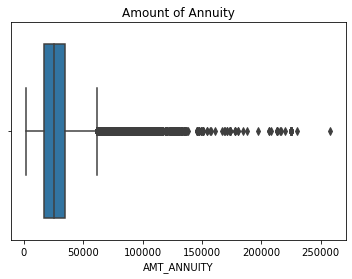

In [48]:
sns.boxplot(application_data.AMT_ANNUITY)
plt.title('Amount of Annuity')
plt.show()

In [124]:
application_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

As we take a look at AMT_ANNUITY column we can see that there are outliers at 258025. But there is no much differece between the mean and median, We can impute the outliers with Median here

#### AMT_INCOME_TOTAL variable

In [49]:
application_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

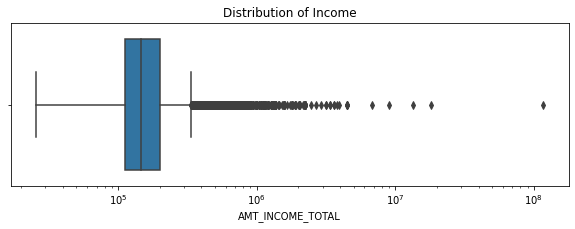

In [50]:
plt.figure(figsize=(10,3))
sns.boxplot(application_data.AMT_INCOME_TOTAL)
plt.xscale('log')
plt.title('Distribution of Income')
plt.show()

In [51]:
application_data.AMT_INCOME_TOTAL.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

1. In 'AMT_INCOME_TOTAL' column, We can see that there are outlier values at 1.17x10^8. Sometimes, it is beneficial to look into the quantiles instead of the box plot, mean or median.<br>2. Quantile may give you a fair idea about the outliers. If there is a huge difference between the maximum value and the 95th or 99th quantiles, then there are outliers in the data set.

#### AMT_CREDIT variable

In [52]:
application_data.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

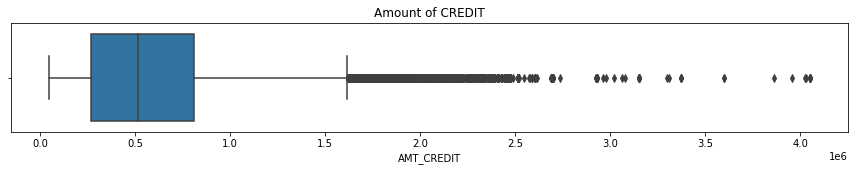

In [53]:
plt.figure(figsize=(15,2))
sns.boxplot(application_data.AMT_CREDIT)
plt.title('Amount of CREDIT')
plt.show()

In [54]:
application_data.AMT_CREDIT.quantile([0.5, 0.7, 0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

### 7. Binning Continuous Variable

#### AMT_INCOME_TOTAL variable

In [55]:
#Creating bins for Credit amount
bins = [0,350000,700000,1000000000]
slots = ['Low','Medium','High']
application_data['AMT_CREDIT_RANGE']=pd.cut(application_data['AMT_CREDIT'],bins=bins,labels=slots)

In [56]:
# Creating bins for income amount
bins = [0,200000,400000,10000000000]
slot = ['Low','Medium','High']
application_data['AMT_INCOME_RANGE']=pd.cut(application_data['AMT_INCOME_TOTAL'],bins=bins,labels=slot)

Checking the imbalance Percentage

In [58]:
# Calculating Imbalance percentage
100*(application_data.TARGET.value_counts())/ (len(application_data))

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

In [200]:
Target_1 =application_data[application_data['TARGET']==1]
Target_0 =application_data[application_data['TARGET']==0]

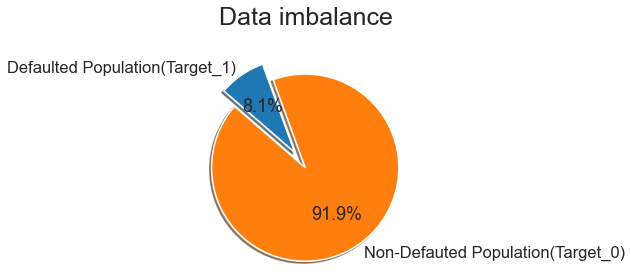

In [169]:
count1 = 0 
count0 = 0
for i in application_data['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1 
count1 = (count1/len(application_data['TARGET']))*100
count0 = (count0/len(application_data['TARGET']))*100
x = ['Defaulted Population(Target_1)','Non-Defauted Population(Target_0)']
y = [count1, count0]
explode = (0.2, 0)  # only "explode" the 1st slice
fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

In [173]:
application_data['AGE'] =application_data['DAYS_BIRTH']
application_data.AGE.describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

In [172]:
#Creating binned variable for AGE
application_data['AGE_GROUP']= pd.cut(application_data.AGE,bins=np.linspace(20 ,70,num=11))

In [203]:
# function to plot for categorical variables
def plotfunc(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target_0)
    plt.title('Distribution of '+ '%s' %var +' for Target_0', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for non-defaulters')
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target_1)
    plt.title('Distribution of '+ '%s' %var +' for Target_1', fontsize=14)
    plt.xlabel(var)
    plt.xticks(rotation=90)
    plt.ylabel('Number of cases for defaulters')
    plt.show()

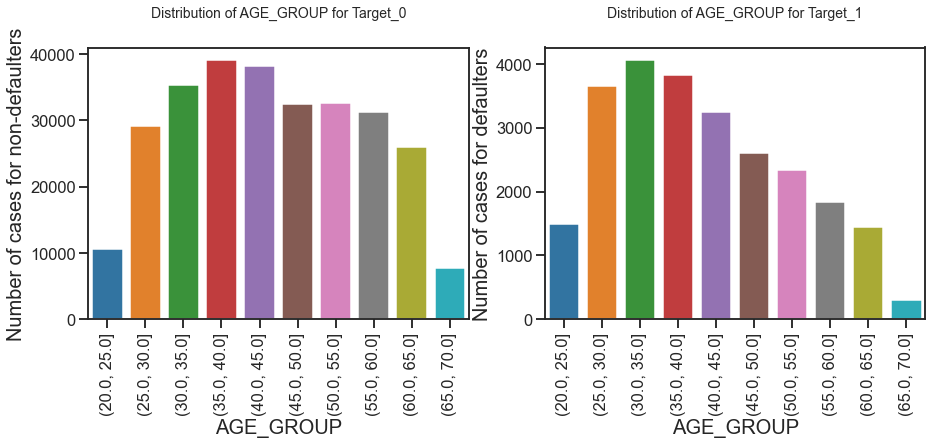

In [204]:
plotfunc('AGE_GROUP')

### 8.1 Univariate Analysis for Target =0 and Target=1

#### Numeric variable

#### AMT_CREDIT_RANGE

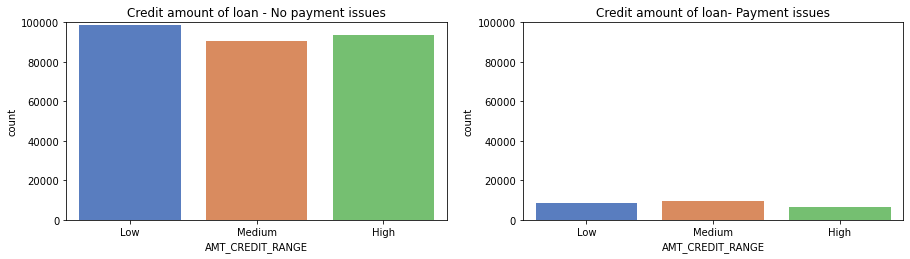

In [63]:
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.ylim(0,100000)
plt.title('Credit amount of loan - No payment issues')
sns.countplot(Target_0['AMT_CREDIT_RANGE'],palette='muted')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Credit amount of loan- Payment issues')
plt.ylim(0,100000)
sns.countplot(Target_1['AMT_CREDIT_RANGE'], palette='muted')
plt.show()

1. Customers with less credit and most likely to make payment.<br>2.Customers having medium and high credit can also be considered while lending the loan

### 9. Univariate & Bivariate Analyis on Numeric Columns

In [64]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=Target_1[var], data=Target_1, order= Target_1[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Target_1', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=Target_0[var], data=Target_0, order= Target_0[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Target_0', fontsize=10)
    plt.show()

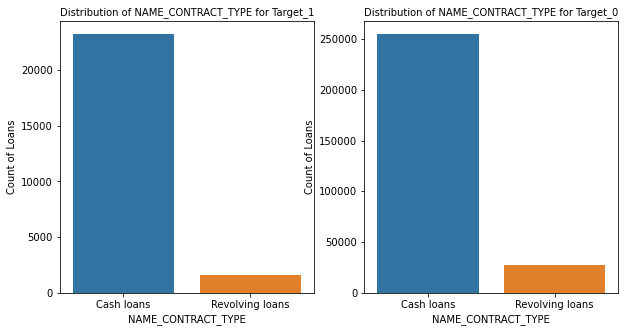

In [65]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

From this information, we see this is an imbalanced dataset. There are far more loans that were repaid on time than loans that were not repaid.
More than 25000 loans were repaid, Less than 5000 loans were not repaid.
We observe that the number of Cash loans is much higher than the number of Revolving loans for both Target = 0 and Target = 1

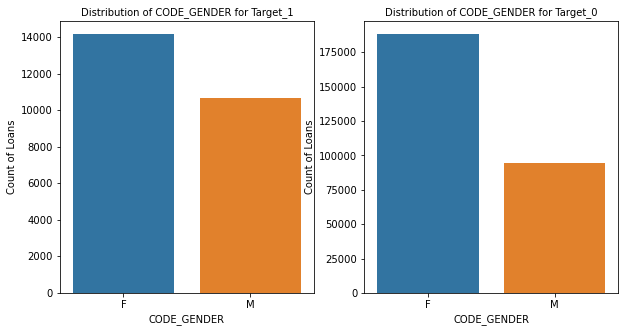

In [66]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

We observe that the number of Females taking loans is much higher than the number of Males for both Target = 0 and Target = 

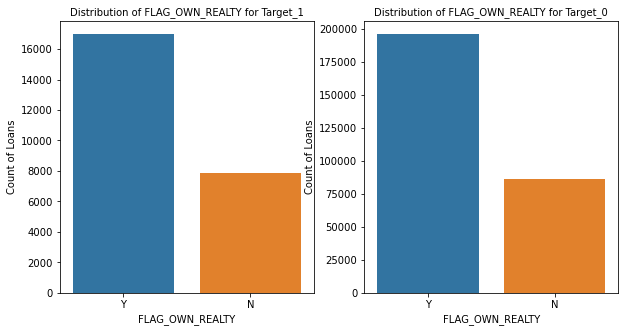

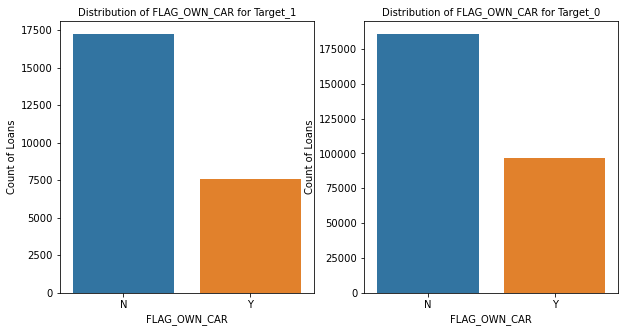

In [67]:
plot_charts('FLAG_OWN_REALTY', label_rotation=False,horizontal_layout=True)
plot_charts('FLAG_OWN_CAR', label_rotation=False,horizontal_layout=True)

We observe that the number of most people applying for loan do not own a car.

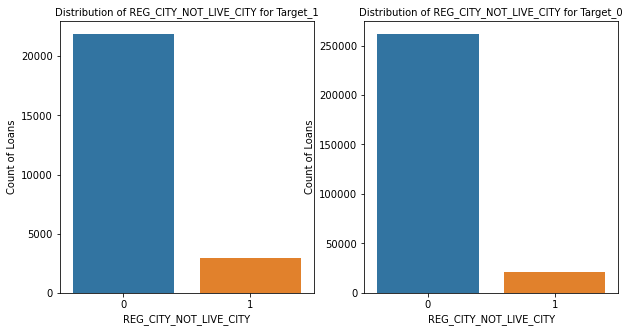

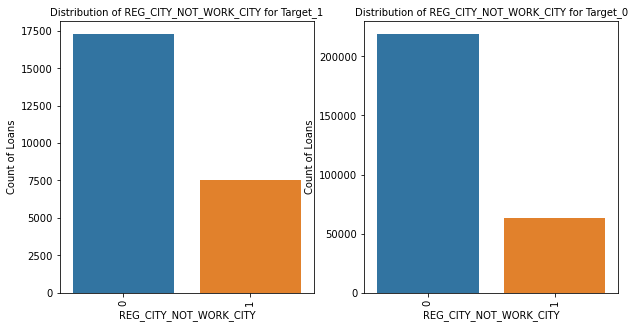

In [68]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

We observe that the Ratio of people whose Registration City is not the same as live city or work city is higher in case of defaulters are compared to defaulters.

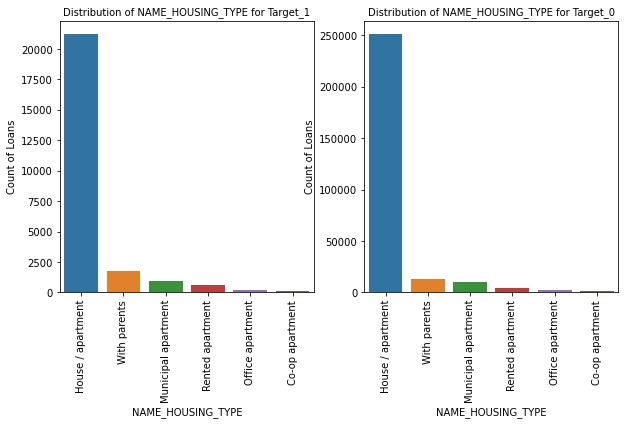

In [69]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

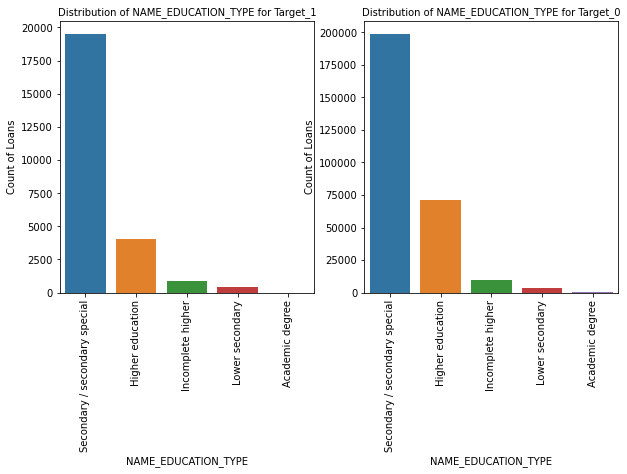

In [70]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

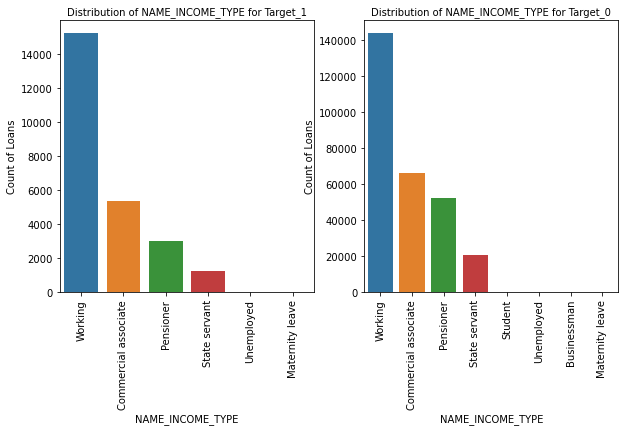

In [71]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

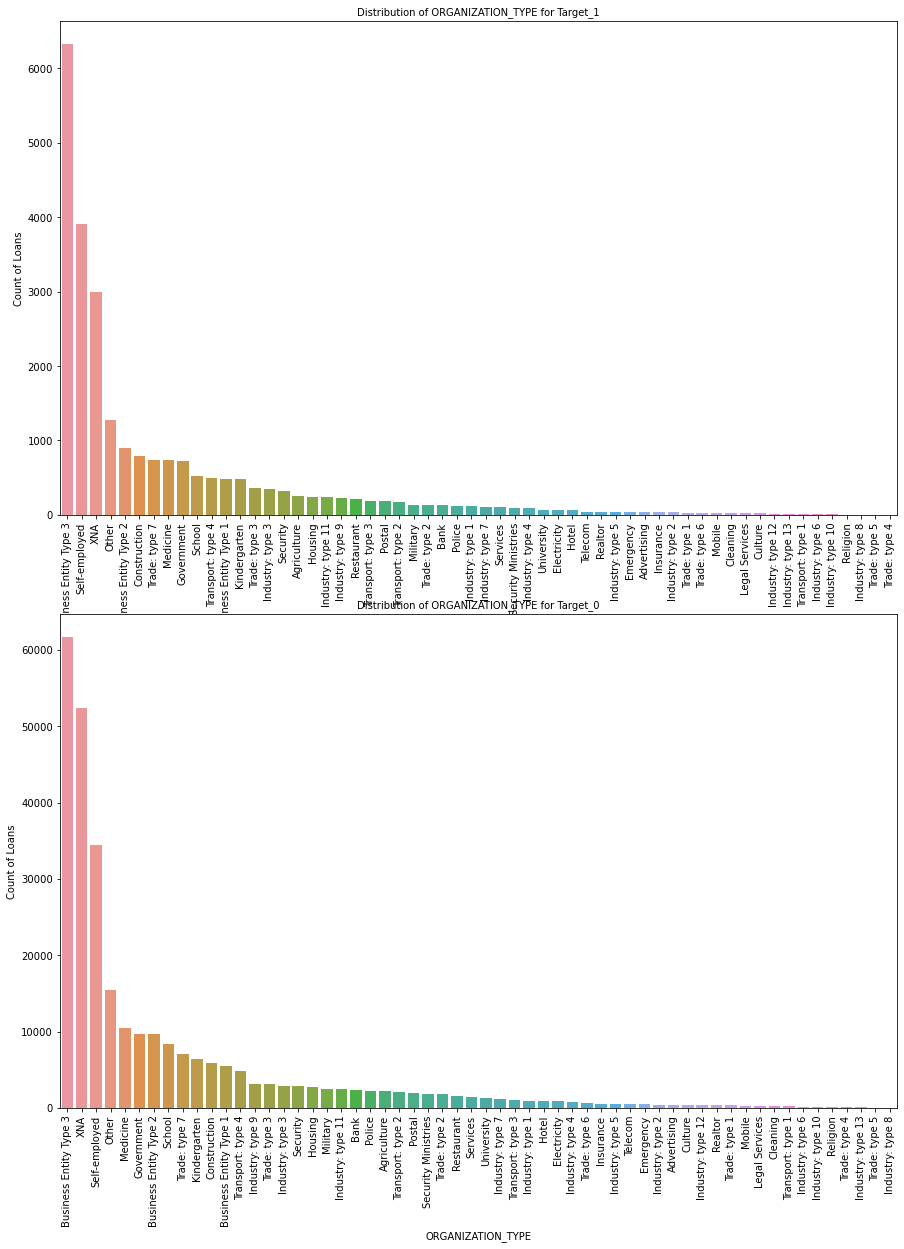

In [72]:
plot_charts('ORGANIZATION_TYPE', label_rotation=True,horizontal_layout=False)

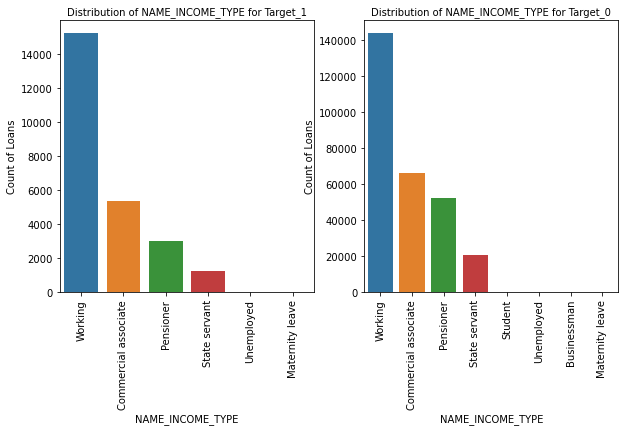

In [73]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

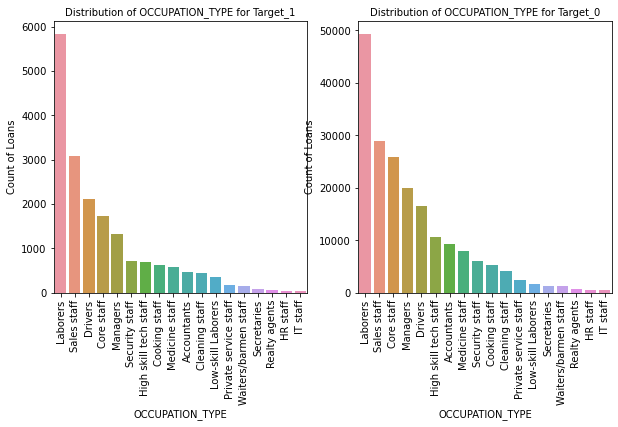

In [74]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

#### Analyse continuous column with respect to the target column

#### Credit Amount

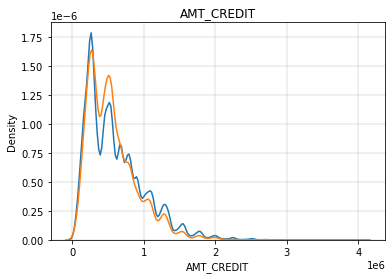

In [75]:
#Analyse continuous column with respect to the target column
sns.distplot(Target_0['AMT_CREDIT'], hist = False, label="Good")# Target = 0
sns.distplot(Target_1['AMT_CREDIT'], hist = False, label='Bad')# Taget = 1
plt.title('AMT_CREDIT')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Amount Annuity

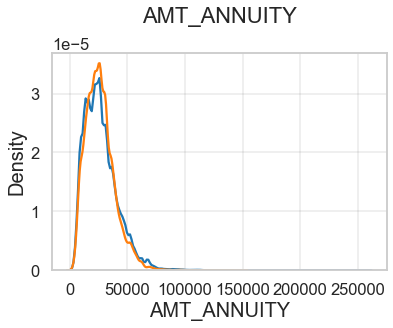

In [105]:
#Analyse continuous column with respect to the target column
sns.distplot(Target_0['AMT_ANNUITY'], hist = False, label="Good")# Target = 0
sns.distplot(Target_1['AMT_ANNUITY'], hist = False, label="Bad")# Taget = 1
plt.title('AMT_ANNUITY')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

#### Goods price

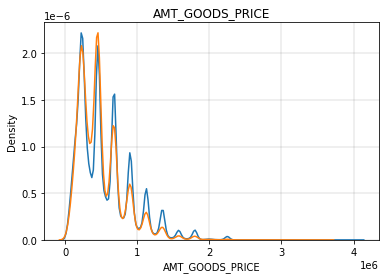

In [77]:
#Analyse continuous column with respect to the target column
sns.distplot(Target_0['AMT_GOODS_PRICE'], hist = False,label= "good")# Target = 0
sns.distplot(Target_1['AMT_GOODS_PRICE'], hist = False, label="bad")# Taget = 1
plt.title('AMT_GOODS_PRICE')
plt.grid(color='black', linestyle='-', linewidth=0.25, alpha=0.5) 
plt.show()

### Analyse Categorical variables with respect to Target variable

In [78]:
#Plot mutiple categorical columns with respect to Target column: Subplot
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
list(enumerate(features))

[(0, 'CODE_GENDER'),
 (1, 'NAME_INCOME_TYPE'),
 (2, 'NAME_EDUCATION_TYPE'),
 (3, 'NAME_FAMILY_STATUS'),
 (4, 'NAME_HOUSING_TYPE'),
 (5, 'OCCUPATION_TYPE')]

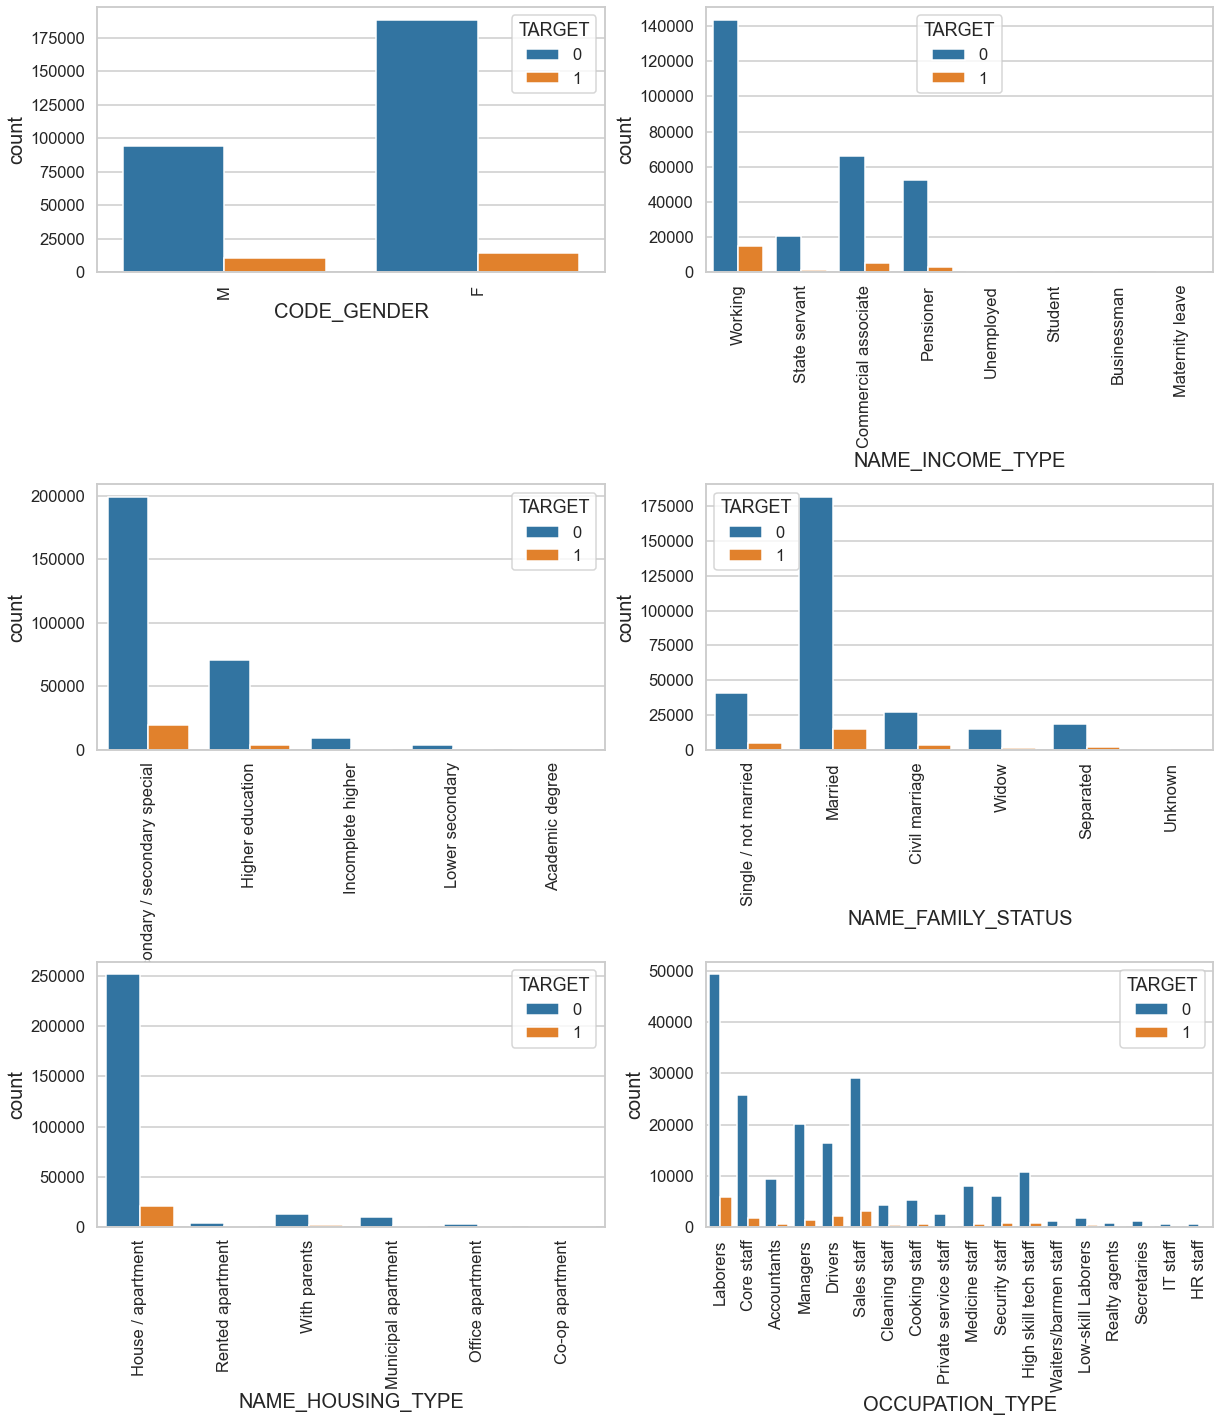

In [106]:
features = ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE']
plt.figure(figsize = (20, 40))

plt.subplots_adjust(hspace=0.8)
for i in enumerate(features):
    plt.subplot(5, 2, i[0]+1)
    sns.countplot(x = i[1], hue = 'TARGET', data = application_data)
    plt.xticks(rotation = 90)

From the above plot we can see that,
1. Female customers pay loan amount on time and banks can target more female cusytomers for lending loan.<br>
2. Working customers can be targetted to lend loans as they have higher percentage of making payments on time.<br>
3. Customers with secondary education are most likely to make payments when compared to customers with academic degree.<br>
4. Married customers have paid loan amount on time when compared to widows.<br>
5. Customers owning House/apartment are most likely to make payments on time compared to those living in CO-OP apartment.<br>
6. Labourers have high repayement percentage. Hence baks can think of lending small amount loans to them.

### 10. Corrleation Matrix

In [154]:
cols= ['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','AMT_CREDIT', 'AMT_INCOME_TOTAL','DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START','DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [80]:
#correlation matrix for all numerical columns
corr=Target_0.corr()
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,-0.002885,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,0.021587,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.010567,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,-0.025036,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,-0.005675,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,-0.024878,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,0.052083,0.001071,0.172814,-0.048217,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,-0.095916,-0.179772,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,0.001744,NaN,-0.245174,-0.140392,-0.070104,-0.104978,-0.068609,-0.007198,0.626114,1.000000,0.214511,0.276663,-0.095455,-0.092842,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [81]:
#Convert the diagonal and below diagonal values of matrix to False, Whereever False is there is replaced with NaN on execution
corr=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,NaN,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,-0.000115,-0.002885,0.001589,-0.000695,0.000556,-0.000741,0.002382,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,NaN,NaN,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,-0.185792,0.028751,-0.005244,0.021587,-0.015455,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,NaN,NaN,NaN,NaN,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,-0.064937,-0.022896,0.076743,0.010567,0.139598,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,NaN,NaN,NaN,NaN,NaN,0.771309,0.987250,0.100604,0.047378,-0.070104,-0.013477,0.001464,0.053619,-0.025036,0.129140,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,NaN,NaN,NaN,NaN,NaN,NaN,0.776686,0.120988,-0.012263,-0.104978,-0.039436,-0.014113,0.053589,-0.005675,0.126615,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.103827,0.044565,-0.068609,-0.015916,0.003649,0.062766,-0.024878,0.135694,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025244,-0.007198,0.052083,0.001071,0.172814,-0.048217,0.198493,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.626114,0.333151,0.271314,-0.095916,-0.179772,0.078158,-0.007726,0.003057,-0.007316,0.000990,-0.004461,-0.002772,0.001069,-0.002855,0.011335,0.072886
DAYS_EMPLOYED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.214511,0.276663,-0.095455,-0.092842,-0.028530,0.007272,0.019379,0.007453,0.016383,-0.004460,-0.000874,0.002223,-0.034890,0.015116,0.052169


In [82]:
#convert it to dataframe
corrdf = corr.unstack().reset_index()
corrdf.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [83]:
#Changing the names of solumns
corrdf.columns=['VAR1','VAR2','Correlation']
corrdf.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,CNT_CHILDREN,NaN
3,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
4,SK_ID_CURR,AMT_CREDIT,NaN


In [84]:
#Drop the columns having the missing data
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf.head()

,VAR1,VAR2,Correlation
50,CNT_CHILDREN,SK_ID_CURR,-0.000716
75,AMT_INCOME_TOTAL,SK_ID_CURR,0.001739
77,AMT_INCOME_TOTAL,CNT_CHILDREN,0.027397
100,AMT_CREDIT,SK_ID_CURR,-0.000342
102,AMT_CREDIT,CNT_CHILDREN,0.003081


In [85]:
#Rounding off the values
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf.head()

,VAR1,VAR2,Correlation
50,CNT_CHILDREN,SK_ID_CURR,-0.00
75,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
77,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
100,AMT_CREDIT,SK_ID_CURR,-0.00
102,AMT_CREDIT,CNT_CHILDREN,0.00


In [86]:
# Since we see correlation as an absolute value, we are converting it into absolute value
corrdf['Correlation'] = corrdf['Correlation'].abs()
corrdf.head()

,VAR1,VAR2,Correlation
50,CNT_CHILDREN,SK_ID_CURR,0.00
75,AMT_INCOME_TOTAL,SK_ID_CURR,0.00
77,AMT_INCOME_TOTAL,CNT_CHILDREN,0.03
100,AMT_CREDIT,SK_ID_CURR,0.00
102,AMT_CREDIT,CNT_CHILDREN,0.00


In [87]:
#Sorting the correlation values
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
440,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
154,AMT_GOODS_PRICE,AMT_CREDIT,0.99
466,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
155,AMT_GOODS_PRICE,AMT_ANNUITY,0.78
129,AMT_ANNUITY,AMT_CREDIT,0.77
233,DAYS_EMPLOYED,DAYS_BIRTH,0.63
128,AMT_ANNUITY,AMT_INCOME_TOTAL,0.42
153,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.35
202,DAYS_BIRTH,CNT_CHILDREN,0.34
103,AMT_CREDIT,AMT_INCOME_TOTAL,0.34


In [88]:
#For target_1 dataframe we perform the same operations to find correlation
corr = Target_1.corr()

corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corr.unstack().reset_index()
corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
# Since we see correlation as an absolute value, we are converting it into absolute valucorrdf['Correlation_abs'] = corrdf0['Correlation'].abs()
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,VAR1,VAR2,Correlation
440,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,1.00
154,AMT_GOODS_PRICE,AMT_CREDIT,0.98
466,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
129,AMT_ANNUITY,AMT_CREDIT,0.75
155,AMT_GOODS_PRICE,AMT_ANNUITY,0.75
233,DAYS_EMPLOYED,DAYS_BIRTH,0.58
441,OBS_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.34
415,DEF_30_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.33
258,DAYS_REGISTRATION,DAYS_BIRTH,0.29
465,DEF_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.26


In [155]:
Target_1=Target_1[cols]
Target_1_correlation = Target_1.corr()
round(Target_1_correlation, 3)

,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_2,1.000,0.131,0.116,0.121,0.007,0.070,0.170,-0.012,0.135,0.060,0.001,0.109
AMT_GOODS_PRICE,0.131,1.000,0.753,0.983,0.038,0.026,0.076,-0.008,0.044,0.056,0.007,0.136
AMT_ANNUITY,0.116,0.753,1.000,0.752,0.046,-0.034,0.072,0.031,0.031,0.017,-0.081,0.014
AMT_CREDIT,0.121,0.983,0.752,1.000,0.038,0.026,0.069,-0.002,0.032,0.052,0.002,0.135
AMT_INCOME_TOTAL,0.007,0.038,0.046,0.038,1.000,-0.000,0.009,0.005,0.014,0.004,-0.015,-0.003
DAYS_REGISTRATION,0.070,0.026,-0.034,0.026,-0.000,1.000,0.056,-0.149,0.033,0.097,0.192,0.289
REGION_POPULATION_RELATIVE,0.170,0.076,0.072,0.069,0.009,0.056,1.000,-0.032,0.143,0.016,0.016,0.048
CNT_CHILDREN,-0.012,-0.008,0.031,-0.002,0.005,-0.149,-0.032,1.000,-0.024,0.032,-0.193,-0.259
HOUR_APPR_PROCESS_START,0.135,0.044,0.031,0.032,0.014,0.033,0.143,-0.024,1.000,-0.022,-0.060,-0.062
DAYS_ID_PUBLISH,0.060,0.056,0.017,0.052,0.004,0.097,0.016,0.032,-0.022,1.000,0.229,0.253


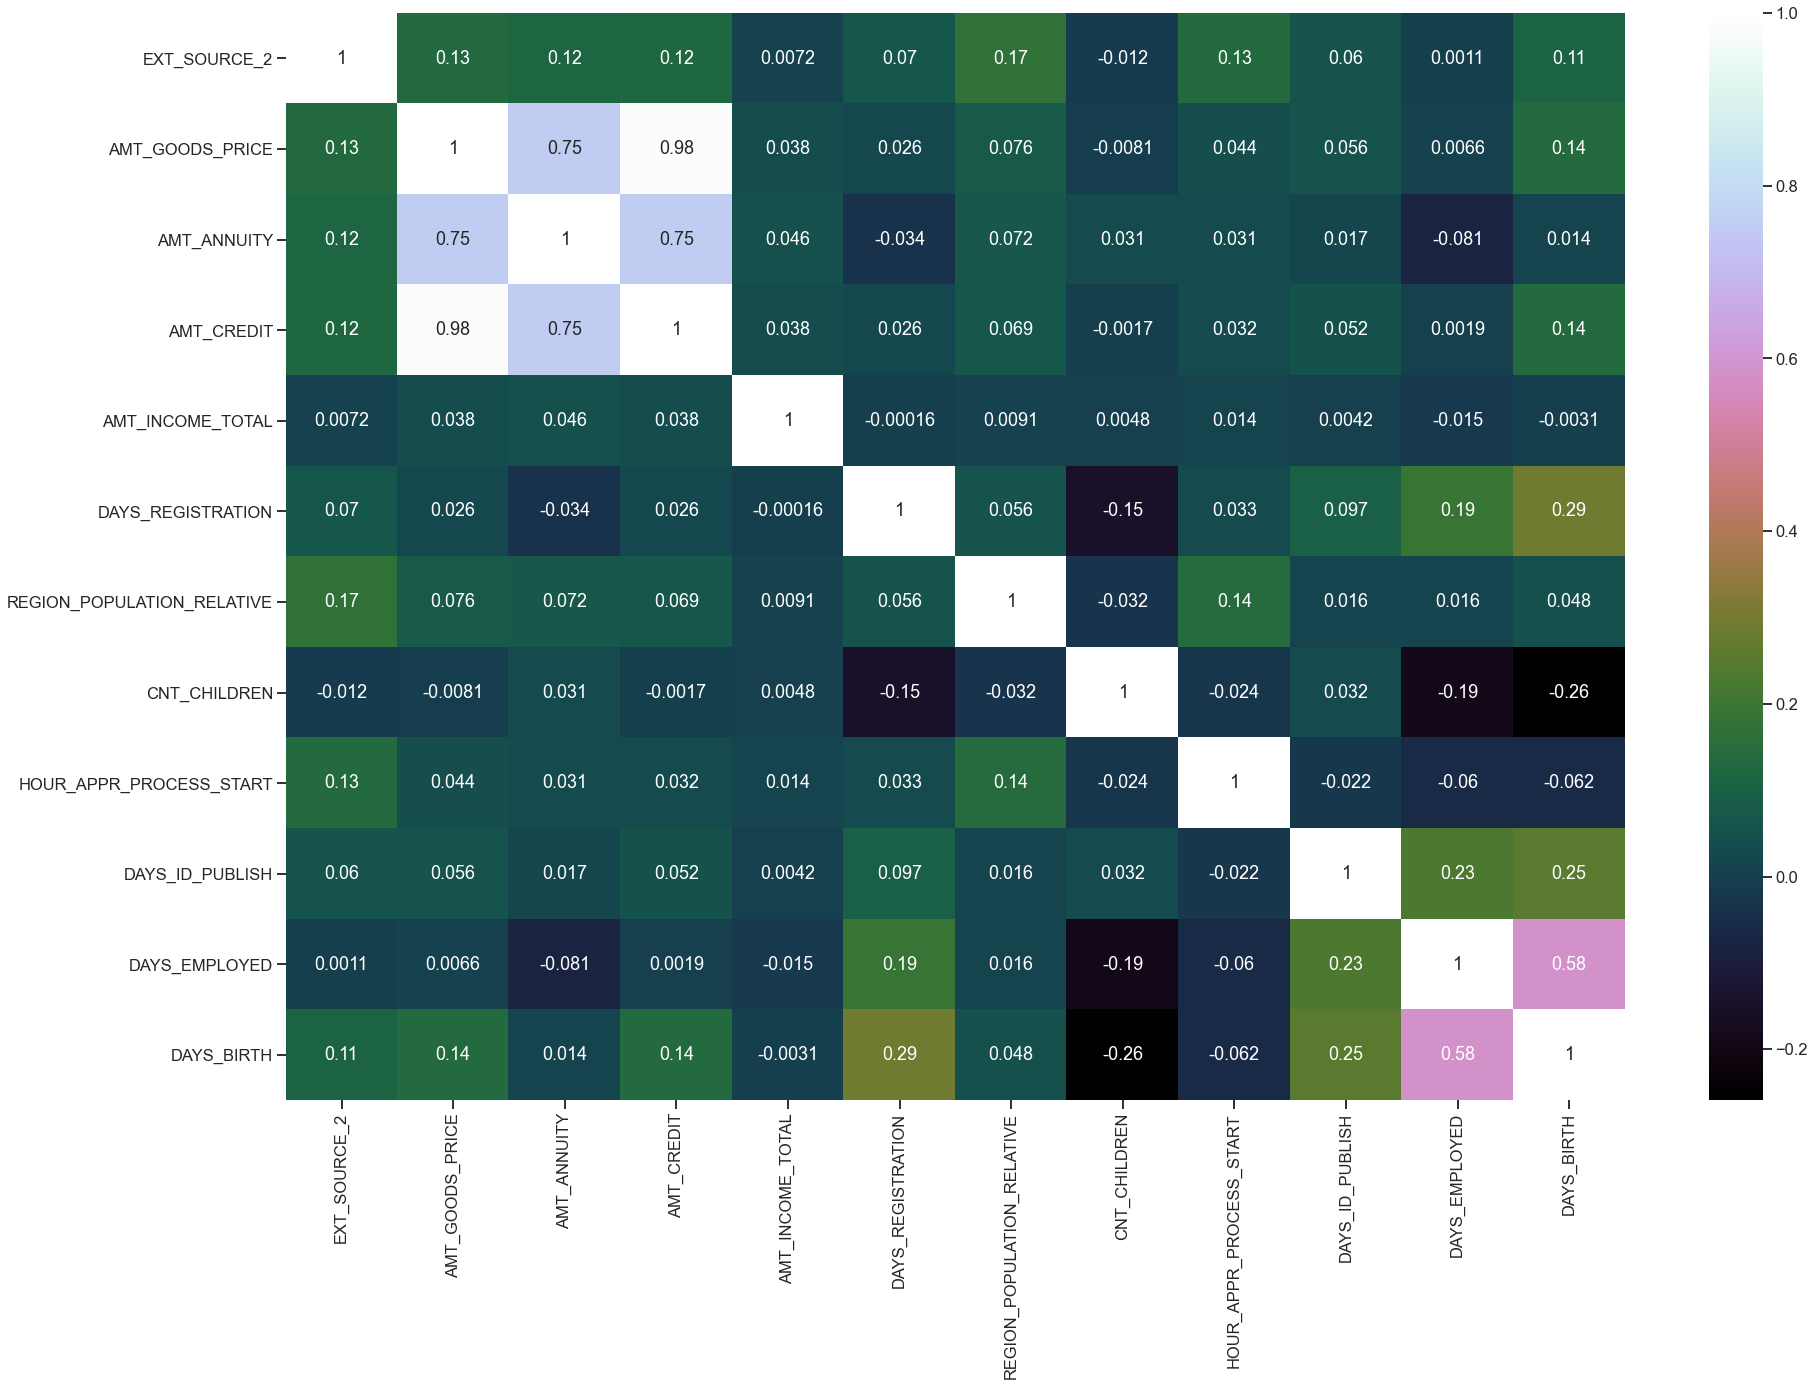

In [160]:
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(Target_1_correlation, cmap="cubehelix", annot=True)
plt.show()

#### 5 most positive correlations
AMT_CREDIT - AMT_GOODS_PRICE<br>
CNT_CHILDREN - CNT_FAM_MEMBERS<br>
AMT_CREDIT - AMT_ANNUITY<br>
AMT_GOODS_PRICE - AMT_ANNUITY<br>
DAYS_EMPLOYED - DAYS_BIRTH

#### 5 most negative correlations
HOUR_APPR_PROCESS_START - DAYS_EMPLOYED<br>
REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START<br>
REGION_POPULATION_RELATIVE - CNT_CHILDRENT<br>
AMT_TOTAL_INCOME - DAYS_EMPLOYED<br>
AMT_TOTAL_INCOM - DAYS_BIRTH

In [163]:
Target_0=Target_0[cols]
Target_0_correlation = Target_0.corr()
round(Target_0_correlation, 3)

,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_2,1.000,0.136,0.127,0.129,0.140,0.053,0.198,-0.015,0.157,0.042,-0.029,0.078
AMT_GOODS_PRICE,0.136,1.000,0.777,0.987,0.349,-0.016,0.104,-0.001,0.063,0.004,-0.069,0.045
AMT_ANNUITY,0.127,0.777,1.000,0.771,0.419,-0.039,0.121,0.021,0.054,-0.014,-0.105,-0.012
AMT_CREDIT,0.129,0.987,0.771,1.000,0.343,-0.013,0.101,0.003,0.054,0.001,-0.070,0.047
AMT_INCOME_TOTAL,0.140,0.349,0.419,0.343,1.000,-0.065,0.168,0.027,0.077,-0.023,-0.140,-0.063
DAYS_REGISTRATION,0.053,-0.016,-0.039,-0.013,-0.065,1.000,0.052,-0.186,0.008,0.100,0.215,0.333
REGION_POPULATION_RELATIVE,0.198,0.104,0.121,0.101,0.168,0.052,1.000,-0.024,0.173,0.001,-0.007,0.025
CNT_CHILDREN,-0.015,-0.001,0.021,0.003,0.027,-0.186,-0.024,1.000,-0.005,0.029,-0.245,-0.337
HOUR_APPR_PROCESS_START,0.157,0.063,0.054,0.054,0.077,0.008,0.173,-0.005,1.000,-0.034,-0.095,-0.096
DAYS_ID_PUBLISH,0.042,0.004,-0.014,0.001,-0.023,0.100,0.001,0.029,-0.034,1.000,0.277,0.271


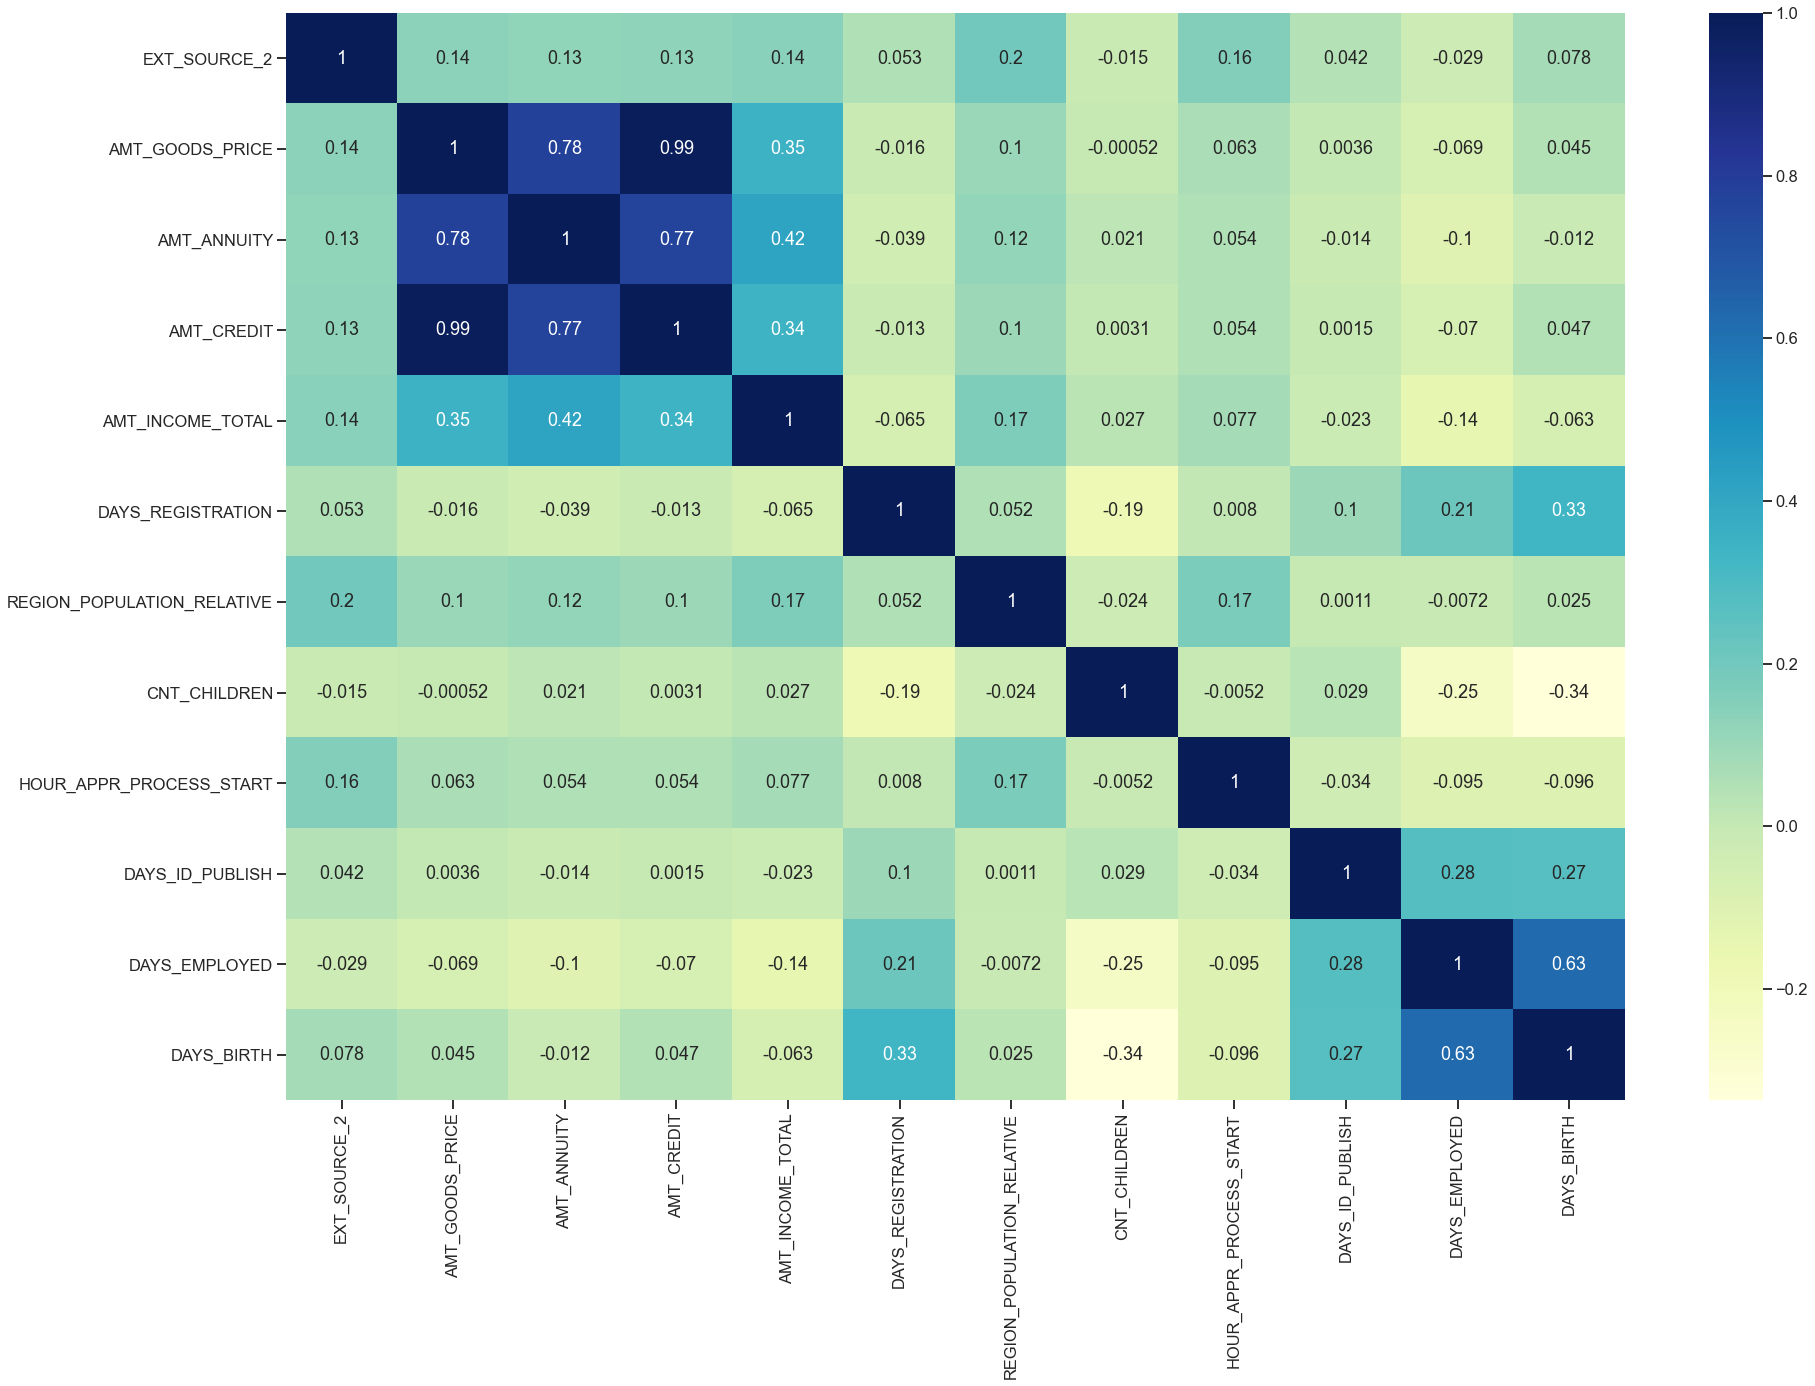

In [165]:
# figure size
plt.figure(figsize=(30,20))
# heatmap
sns.heatmap(Target_0_correlation, cmap="YlGnBu", annot=True)
plt.show()

### 11. Bivariate Analysis for target 0 and target 1

#### Income vs Credit, Goods price vs Credit

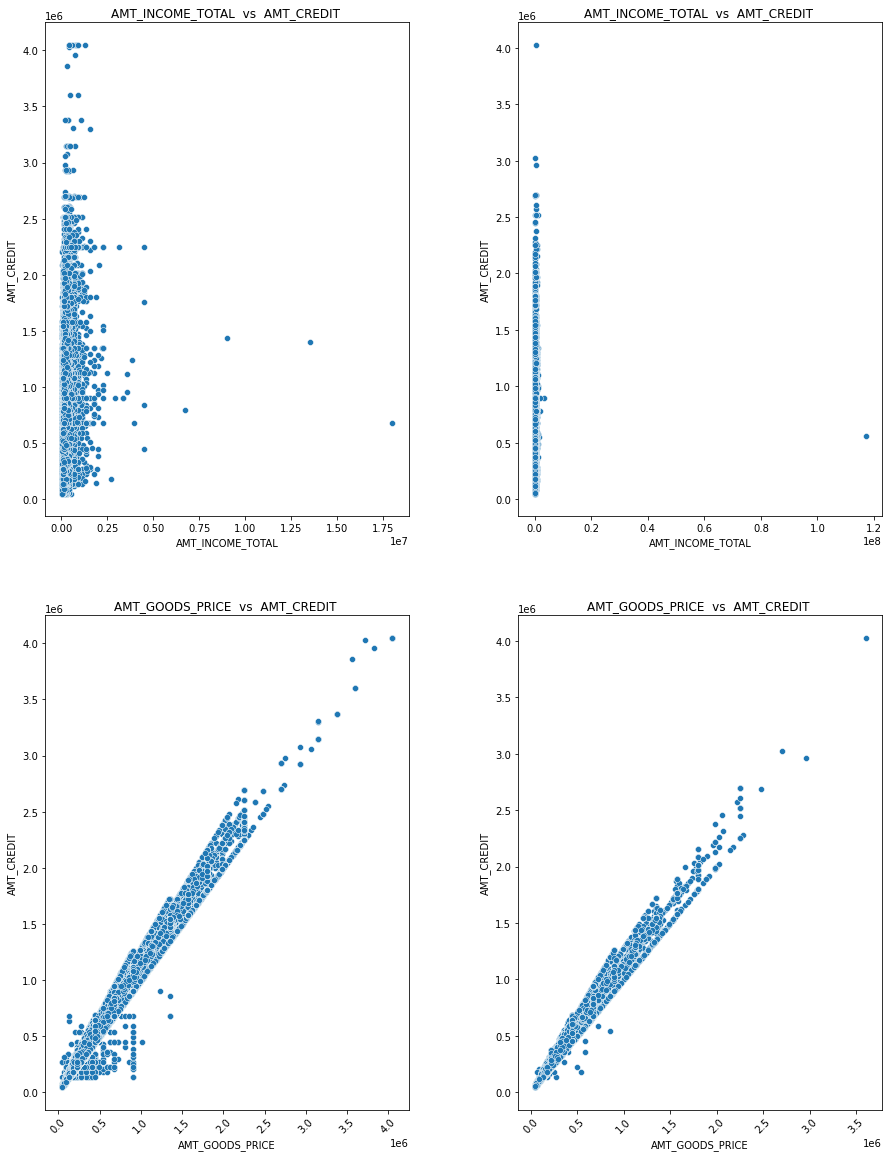

In [89]:
#Scatter plot for numeric columns

plt.figure(figsize = (15, 20))
plt.subplots_adjust(wspace=0.3)


plt.subplot(2,2,1)
sns.scatterplot(Target_0.AMT_INCOME_TOTAL,Target_0.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')

plt.subplot(2,2,2)
sns.scatterplot(Target_1.AMT_INCOME_TOTAL,Target_1.AMT_CREDIT)
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_INCOME_TOTAL  vs  AMT_CREDIT ')


plt.subplot(2,2,3)
sns.scatterplot(Target_0.AMT_GOODS_PRICE,Target_0.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)

plt.subplot(2,2,4)
sns.scatterplot(Target_1.AMT_GOODS_PRICE,Target_1.AMT_CREDIT)
plt.xlabel('AMT_GOODS_PRICE')
plt.ylabel('AMT_CREDIT')
plt.title('AMT_GOODS_PRICE  vs  AMT_CREDIT ')
plt.xticks(rotation = 45)
plt.show()

Those who have paid the loan amount on/within time are more likely to get higher credits than those who didnt pay/did late payments.People who have higher goods price and have made payments on time have higher credits than those with higher goods price but didnt pay loan.

#### Numerical categorical analysis

#### Income range- Gender

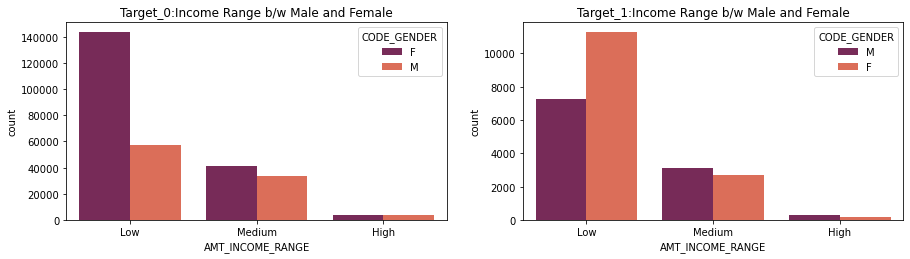

In [90]:
# Numeric variable analysis for target_0 & target_1 dataframe
plt.figure(figsize = (15, 8))
plt.subplot(2, 2, 1)
plt.title('Target_0:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=Target_0, palette='rocket')

# subplot 2
plt.subplot(2, 2, 2)
plt.title('Target_1:Income Range b/w Male and Female')

sns.countplot(x='AMT_INCOME_RANGE', hue='CODE_GENDER', data=Target_1,palette='rocket')
plt.show()

We can see that Females with low income don’t have any payment issues.

#### Credit amount vs Education Status

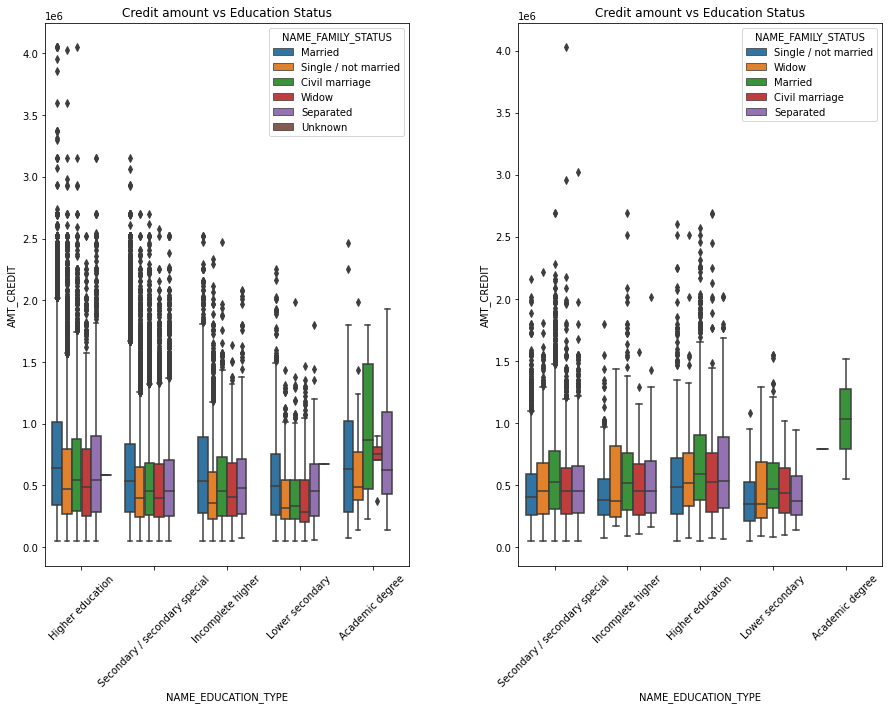

In [91]:
# Box plotting for Credit amount

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.3)

plt.subplot(121)
sns.boxplot(data =Target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)

plt.subplot(122)
sns.boxplot(data =Target_1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v]')
plt.title('Credit amount vs Education Status')
plt.xticks(rotation=45)
plt.show()

### From the above plot,we can see that¶
1.Some of the highly educated, married person are having credits higher than those who have done lower secondary eduction. <br>
2.Those with higher eduction have higher credits and are more likely to make payments on time.<br>
3.More number of outliers are seen in higher education.<br>
4.The people with secondary and secndary special eduction are less likely to make payments on time

#### Income vs Education Status

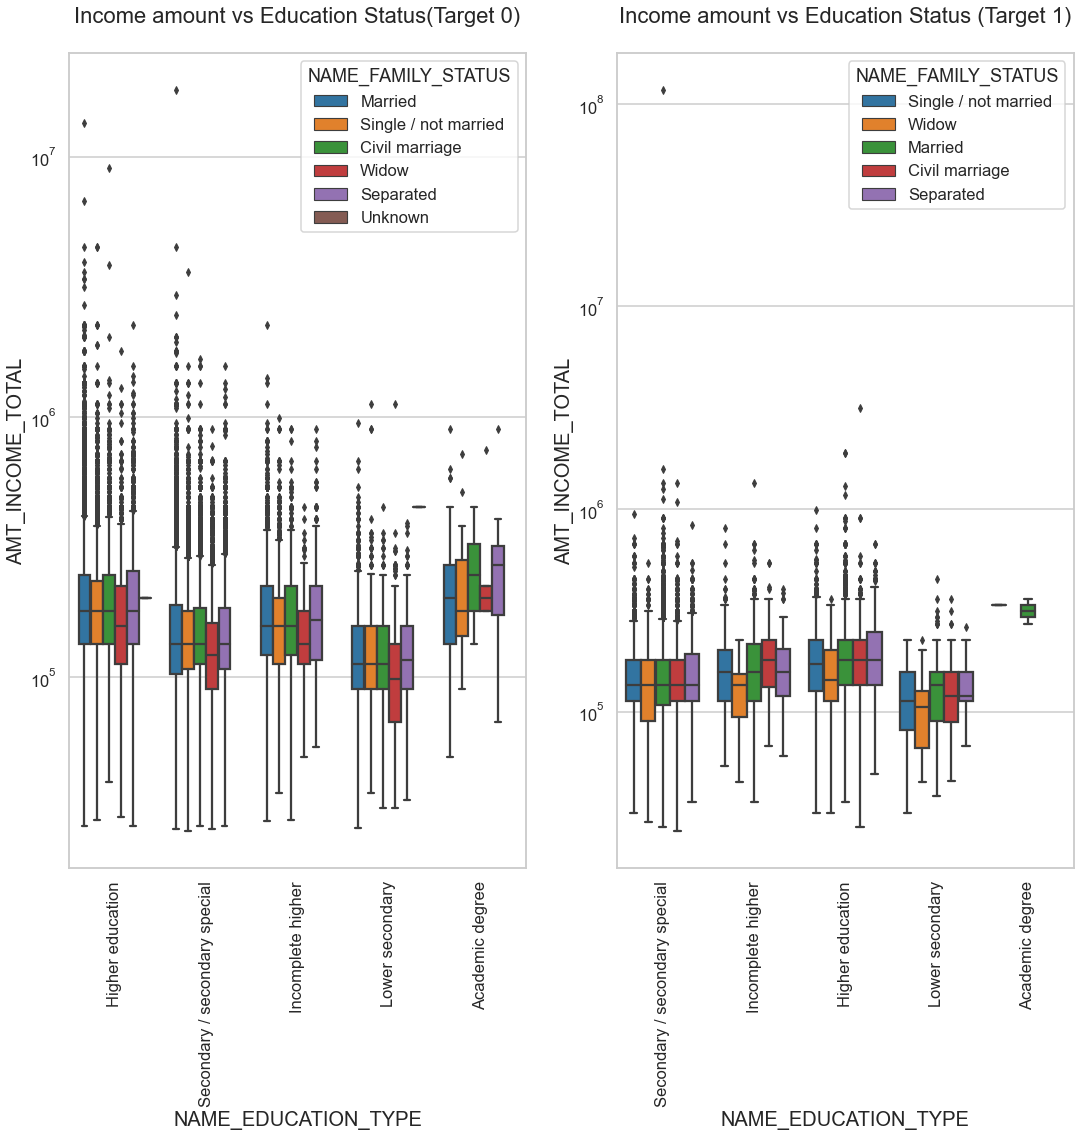

In [111]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(18,15))
plt.subplot(1,2,1)
plt.yscale('log')
sns.boxplot(data =Target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status(Target 0)')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.yscale('log')
sns.boxplot(data =Target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status (Target 1)')
plt.xticks(rotation=90)
plt.show()

###  From the above plots,¶
1.we can see that Higher education has many outliers.<br>
2.People with higher eductaion have higher income and dont have difficulties in making loan payment.<br>
3.People with higher education who ave lesser income are unable to pay the loan.<br>
Hence we can conclude that,people with Higher income are most likely to make payments

### 12.Reading the previous application

In [93]:
previous_application.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0
1670213,2418762,261212,Cash loans,16431.300,360000.0,360000.0,NaN,360000.0,SUNDAY,10,Y,1,NaN,NaN,NaN,XNA,Approved,-1193,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,48.0,middle,Cash X-Sell: middle,365243.0,-1163.0,247.0,-443.0,-423.0,0.0


In [94]:
# Removing the column values of 'XNA' and 'XAP'
previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
previous_application=previous_application.drop(previous_application[previous_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

In [95]:
#Merge the previous application with the current application data file
merged_df= pd.merge(application_data, previous_application, how='inner', on='SK_ID_CURR',suffixes='_x')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28.331507,2.767123,13.147945,8.260274,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,0-20,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41.863014,7.309589,14.427397,10.375342,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,0-20,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32.038356,5.643836,9.745205,9.745205,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,0-20,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.180822,4.824658,22.564384,11.758904,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,0-20,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,

In [107]:
merged_df.shape

(59413, 81)

In [108]:
merged_df.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,59413.000000,59413.000000,59413,59413,59413,59413,59413.000000,5.941300e+04,5.941300e+04,59406.000000,5.935400e+04,59218,59413,59413,59413,59413,59413.000000,59413.000000,59413.000000,59413.000000,59413.000000,43205,59413,59413.000000,59413.0,59413.0,59413.0,59413.000000,59413.0,59413.0,59413,59346.000000,59327.000000,59327.000000,59327.000000,59327.000000,52850.000000,52850.000000,52850.000000,52850.000000,52850.000000,52850.000000,59413,59413,59413,5.941300e+04,59413,59179.000000,5.941300e+04,5.941300e+04,6174.0,5.941300e+04,59413,59413.000000,59413,59413.000000,6174.0,0.0,0.0,59413,59413,59413.000000,59413,59413,35690,59413,59413,59413,59413,59413,59413.000000,59413,59179.000000,59413,59413,21142.0,21142.000000,21142.000000,21142.000000,21142.000000,21142.000000
unique,NaN,NaN,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,6,5,5,6,NaN,NaN,NaN,NaN,NaN,18,7,NaN,2.0,2.0,2.0,NaN,2.0,2.0,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,NaN,1,NaN,NaN,NaN,NaN,NaN,7,NaN,1,NaN,NaN,NaN,NaN,23,4,NaN,4,9,7,4,1,2,3,7,NaN,8,NaN,5,7,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,Laborers,TUESDAY,NaN,0.0,0.0,0.0,NaN,0.0,0.0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,Low,0-20,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,Y,NaN,NaN,NaN,NaN,Repairs,Refused,NaN,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,NaN,XNA,NaN,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,55994,38829,38518,43689,NaN,NaN,NaN,NaN,NaN,49259,32186,43618,38171,53283,NaN,NaN,NaN,NaN,NaN,10862,10866,NaN,58641.0,56552.0,57125.0,NaN,44834.0,48110.0,14316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21858,38624,59413,NaN,59413,NaN,NaN,NaN,NaN,NaN,10340,NaN,59413,NaN,NaN,NaN,NaN,20117,34786,NaN,54349,24444,28646,47922,59413,59179,58364,42177,NaN,54404,NaN,24736,24570,NaN,NaN,NaN,NaN,NaN,NaN
mean,278525.178968,0.130258,NaN,NaN,NaN,NaN,0.411290,1.821284e+05,5.598321e+05,26868.672962,5.014664e+05,NaN,NaN,NaN,NaN,NaN,0.020987,43.710174,140.053049,12.710717,8.064124,NaN,NaN,11.980728,NaN,NaN,NaN,0.080336,NaN,NaN,NaN,0.499952,1.669206,0.163248,1.651103,0.112512,0.006206,0.006755,0.039167,0.353113,0.364068,3.469290,NaN,NaN,NaN,1.935293e+06,NaN,25684.687286,4.519988e+05,5.079813e+05,0.0,4.519988e+05,NaN,12.175147,NaN,0.999108,0.0,NaN,NaN,NaN,NaN,-631.822833,

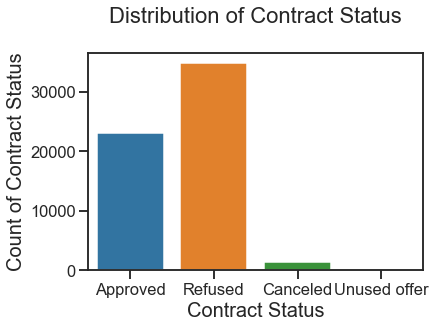

In [166]:
sns.countplot(merged_df.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

In [96]:
new_df = merged_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28.331507,2.767123,13.147945,8.260274,Laborers,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,0-20,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,FRIDAY,11,Y,1,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41.863014,7.309589,14.427397,10.375342,NaN,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,0-20,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32.038356,5.643836,9.745205,9.745205,Drivers,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,0-20,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,MONDAY,14,Y,1,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.180822,4.824658,22.564384,11.758904,Managers,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,0-20,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,MONDAY,13,Y,1,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0

In [97]:
# Removing unwanted columns for analysis

new_df.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28.331507,2.767123,13.147945,8.260274,Laborers,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,0-20,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41.863014,7.309589,14.427397,10.375342,NaN,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,0-20,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32.038356,5.643836,9.745205,9.745205,Drivers,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,0-20,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.180822,4.824658,22.564384,11.758904,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,0-20,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.180822,4.824658,22.564384,11.758904,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,0-20,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
new_df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE_,NAME_TYPE_SUITE_,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_RANGE,AMT_INCOME_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICEx,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITEx,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,28.331507,2.767123,13.147945,8.260274,Laborers,Business Entity Type 3,0.502779,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,Low,Low,0-20,1390369,Cash loans,22430.430,94500.0,109971.0,NaN,94500.0,NaN,NaN,NaN,Other,Approved,-599,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high,365243.0,-569.0,-419.0,-449.0,-443.0,1.0
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,41.863014,7.309589,14.427397,10.375342,NaN,Business Entity Type 3,0.479987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,Medium,0-20,1344613,Cash loans,33238.800,1260000.0,1260000.0,NaN,1260000.0,NaN,NaN,NaN,Payments on other loans,Refused,-119,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,32.038356,5.643836,9.745205,9.745205,Drivers,Self-employed,0.321745,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,High,Medium,0-20,1077565,Cash loans,52513.515,1350000.0,1487214.0,NaN,1350000.0,NaN,NaN,NaN,Buying a used car,Approved,-695,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low,365243.0,-665.0,565.0,-455.0,-446.0,1.0
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.180822,4.824658,22.564384,11.758904,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,0-20,1223113,Cash loans,28390.635,337500.0,407911.5,NaN,337500.0,NaN,NaN,NaN,Repairs,Approved,-539,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low,365243.0,-509.0,1.0,365243.0,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,44.180822,4.824658,22.564384,11.758904,Managers,Business Entity Type 3,0.738053,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,Low,0-20,1529558,Cash loans,29053.215,450000.0,555723.0,NaN,450000.0,NaN,NaN,NaN,Repairs,Refused,-449,Cash through the bank,LIMIT,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


### Univariate Analysis

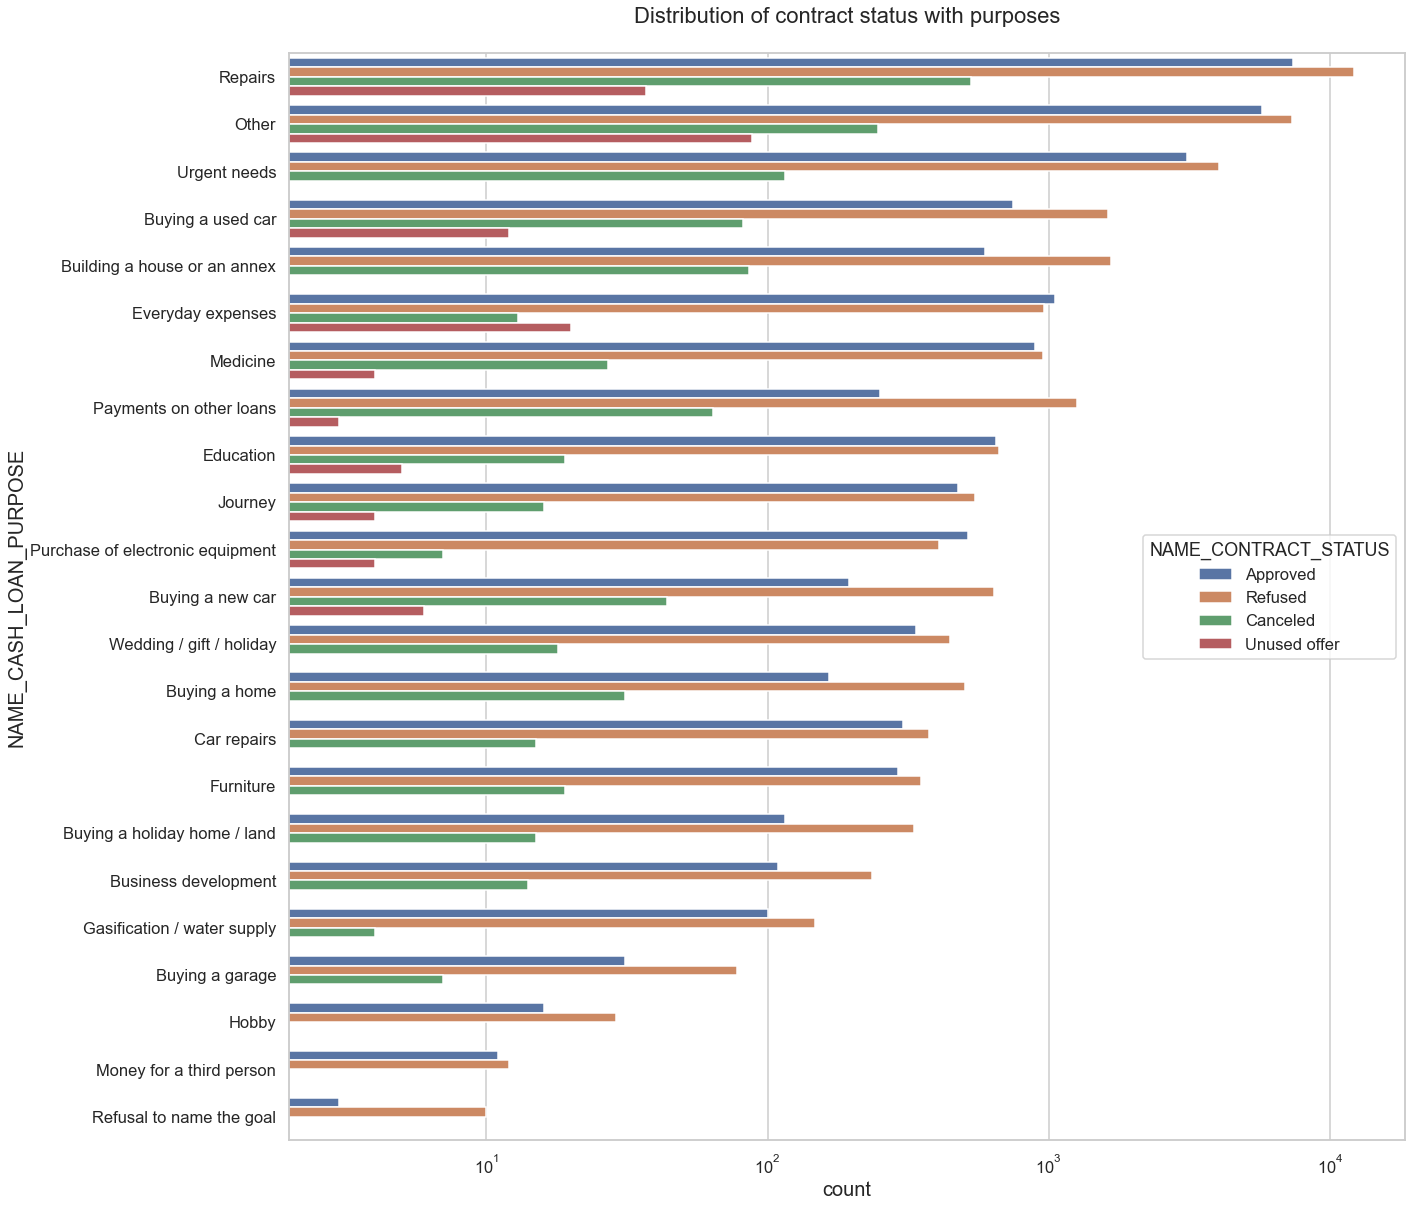

In [109]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks()
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax=sns.countplot(data = new_df, y='NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='deep')

Points to be concluded from above plot:¶
Most rejection of loans came from purpose 'Repairs'. For education purposes we have equal number of approves and rejection PayinG other loans and buying a new car is having significant higher rejection than approves.

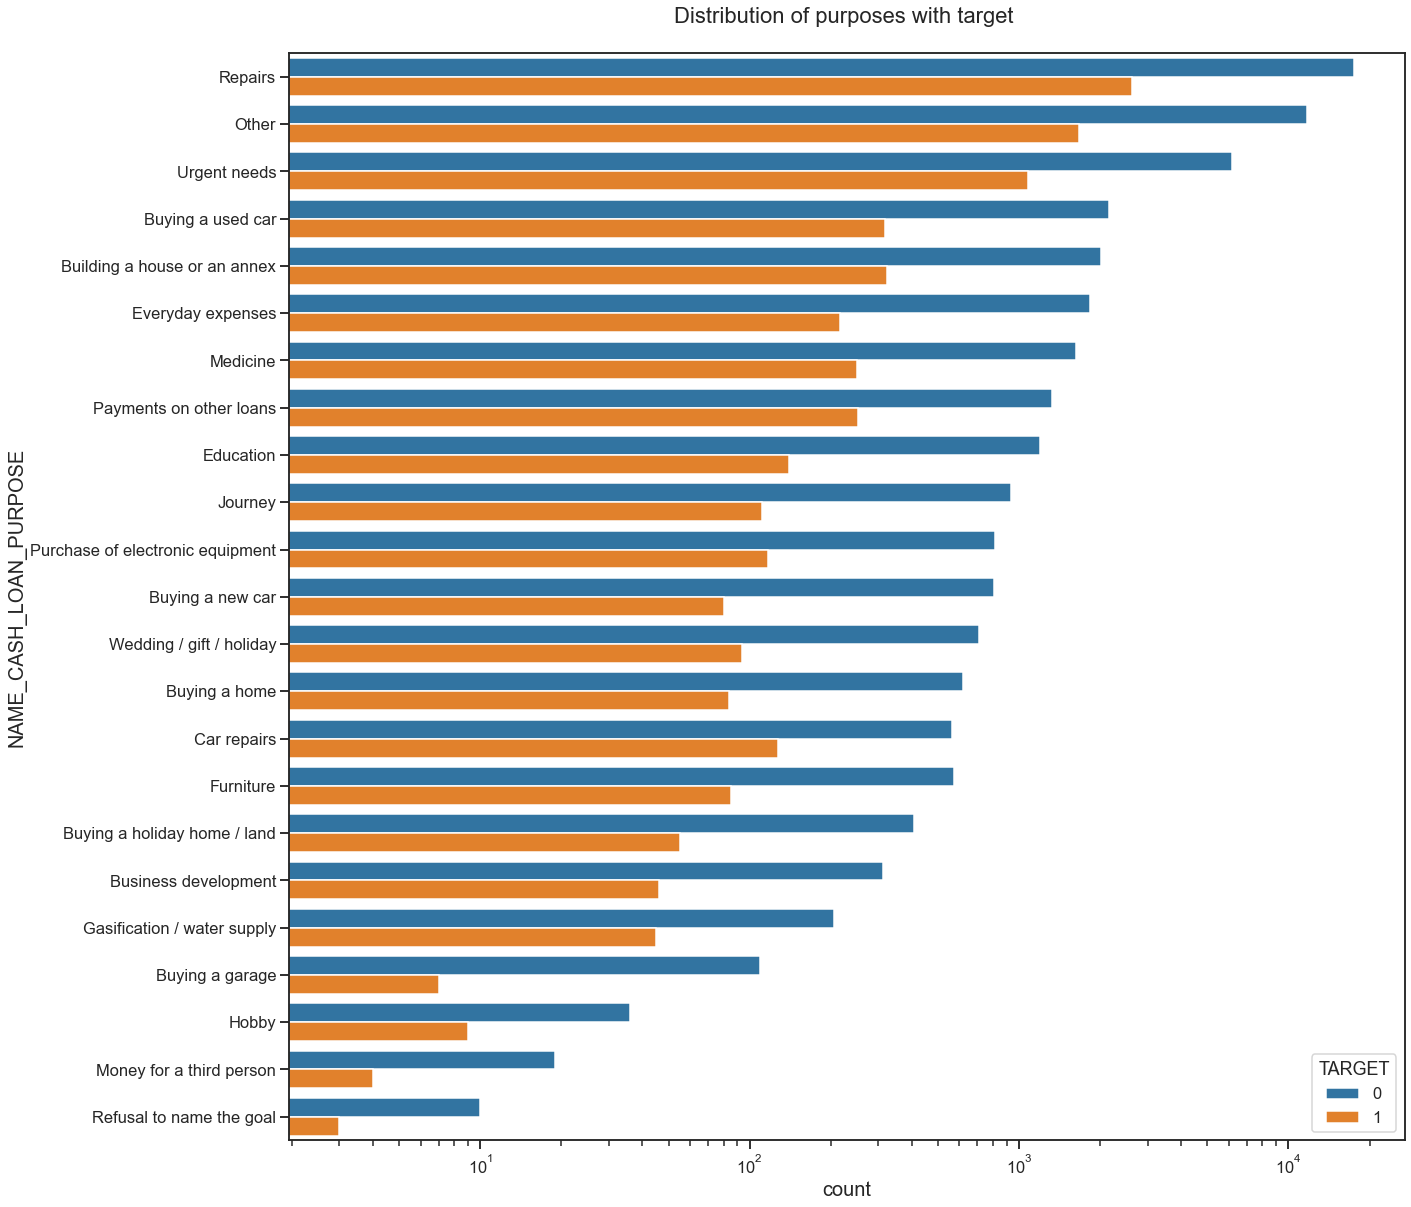

In [122]:
# Distribution of contract status

sns.set_style('ticks')
sns.set_context('talk')

plt.figure(figsize=(20,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks()
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df, y= 'NAME_CASH_LOAN_PURPOSE', order=new_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

Few points we can conclude from above plot:
Loan purposes with 'Repairs' are facing more difficulites in payment on time. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties

### Bivariate Analysis

#### Prev Credit amount vs Loan Purpose

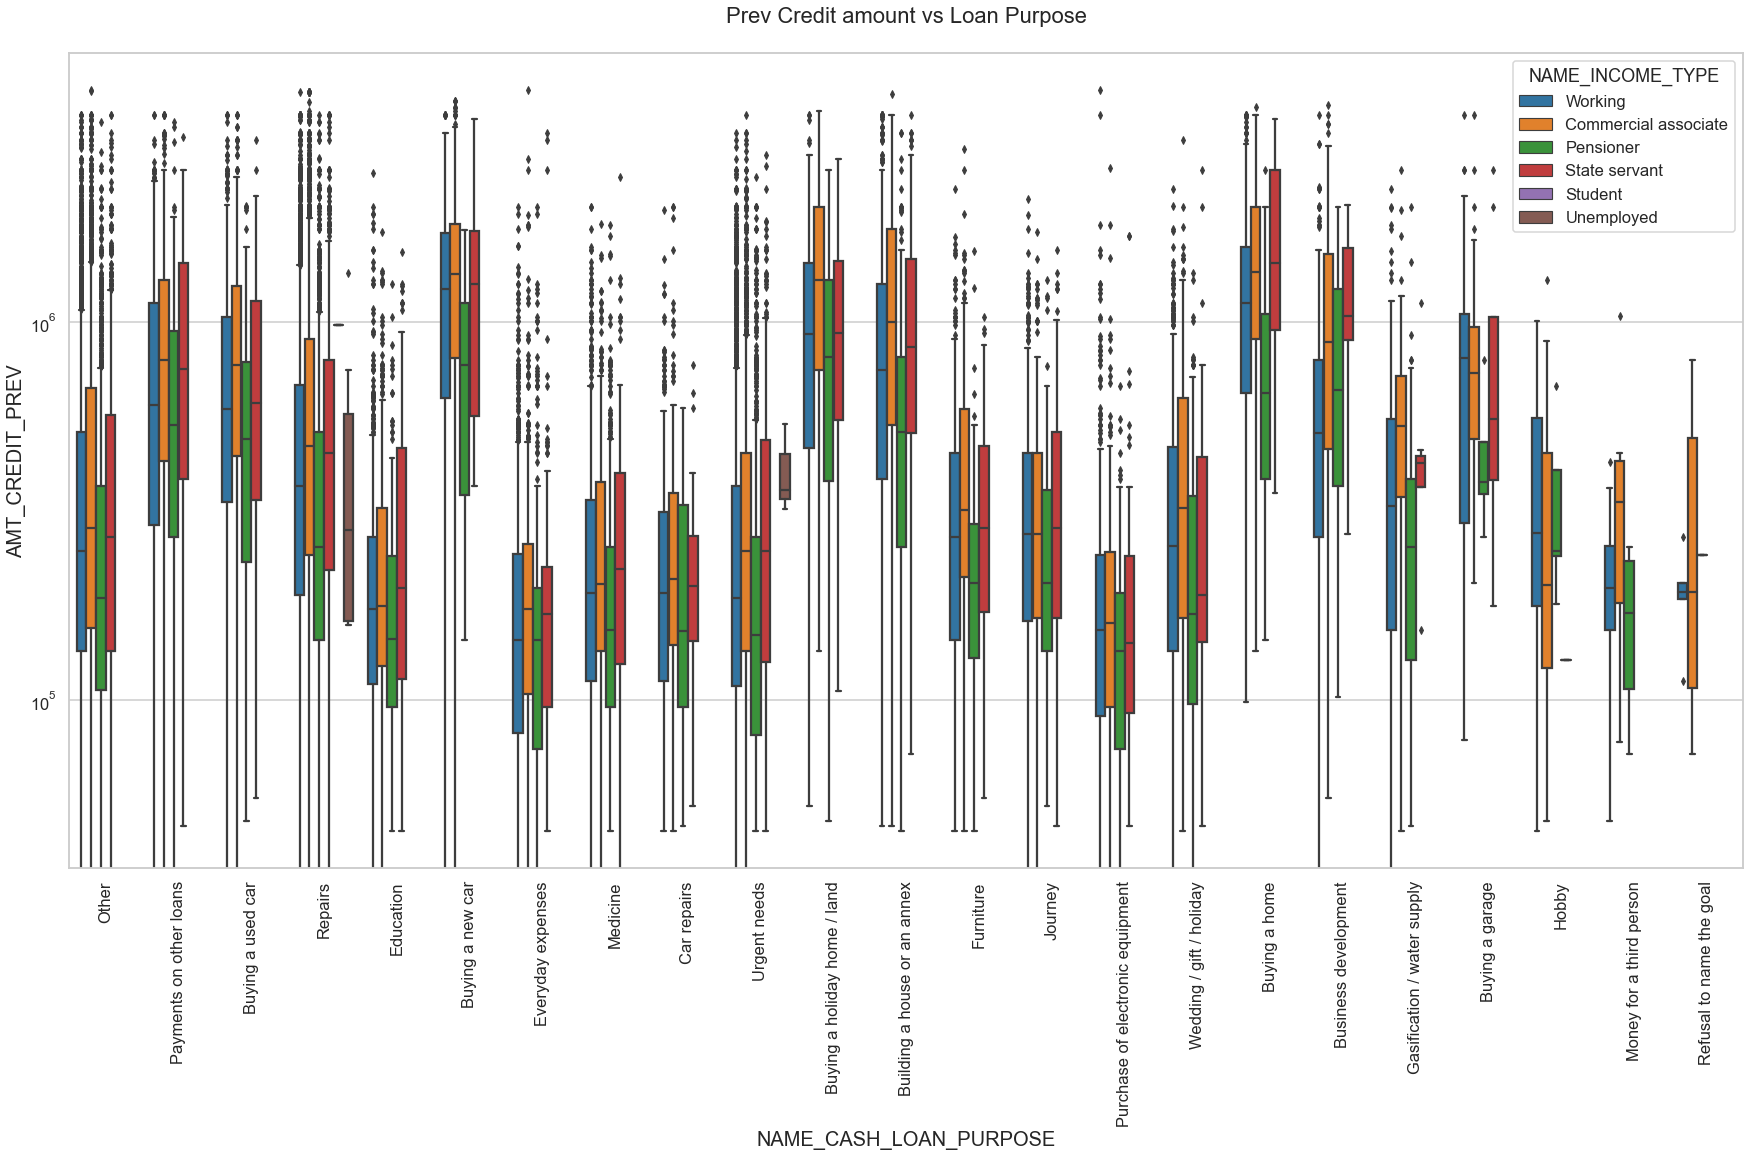

In [101]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.yscale('log')

sns.boxplot(data =new_df, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()

From the above we can conclude some points- The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher. Income type of state servants have a significant amount of credit applied Money for third person or a Hobby is having less credits applied for.

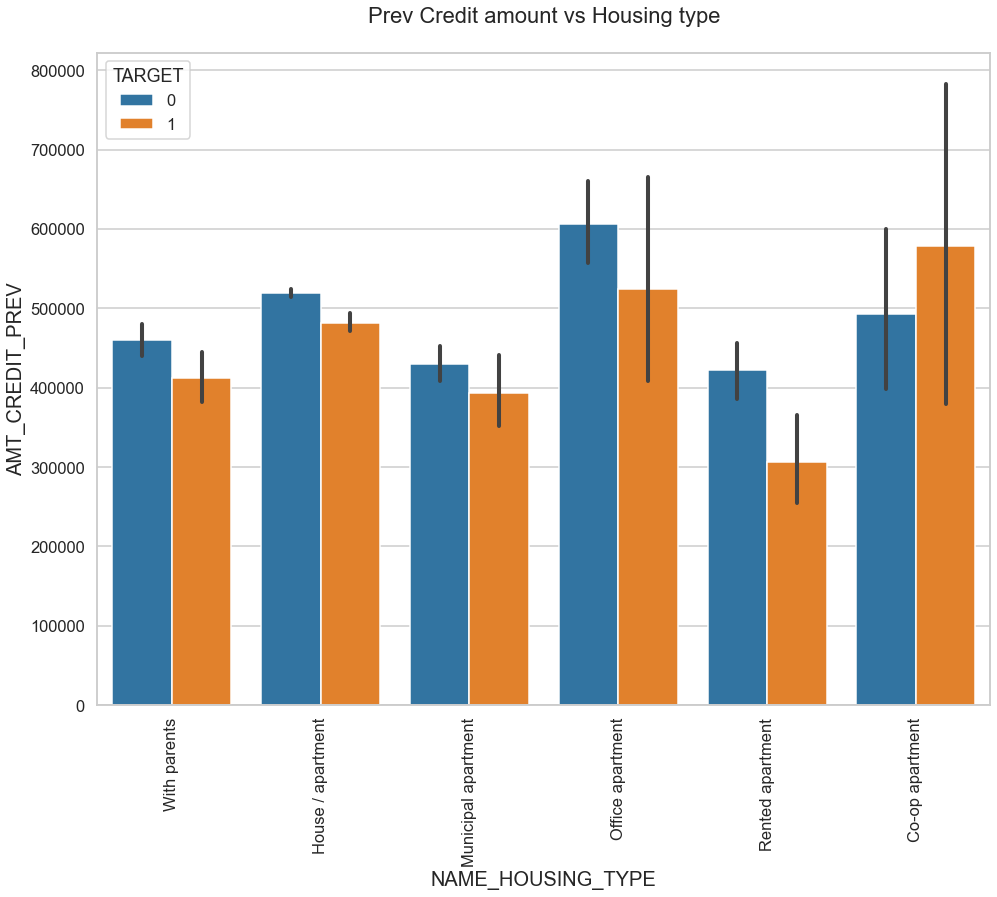

In [102]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE',)
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments

### CONCLUSION
1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.
2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.
3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments